# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

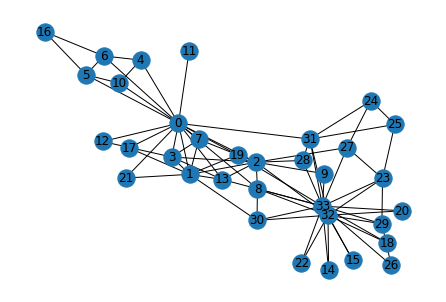

In [3]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = round(2 * num_edges/num_nodes)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [5]:
from statistics import mean
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  print(mean(nx.clustering(G).values()))
  avg_cluster_coef = round(sum(nx.clustering(G).values())/G.number_of_nodes(),2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

0.5706384782076823
Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank

  pagerank_with_xn = nx.pagerank(G,max_iter=1,tol=10,alpha=beta)[node_id]
  print(f"Node 0 pagerang value from nx.pagerank(g) {pagerank_with_xn} rounded to {round(pagerank_with_xn,2)}")

  # print(G.nodes())
  # node_0_attr = G.nodes[0]
  # print(node_0_attr)
  # print(G.edges())
  # print(f"Is graph directed: {G.is_directed()}")
  # print(f"Degree of node 0: {G.degree[0]}")

  print(f"In edges for node 0: {G.edges(0)}")
  # [print(G.degree(edge[1])) for edge in G.edges(0)] 
  r1 = round(sum([beta * r0/G.degree(edge[1]) for edge in G.edges(0)]) + (1-beta) * 1/G.number_of_nodes(),2)

  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

Node 0 pagerang value from nx.pagerank(g) 0.1281045751633987 rounded to 0.13
In edges for node 0: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [7]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  #########################################
  norm_closeness = nx.closeness_centrality(G)
  print(f"Normalized closeness where there is N instead of 1 in the formula: {norm_closeness[5]}")
  print(f"Unnomralized closeness by dividing with (N - 1): {norm_closeness[5] / (G.number_of_nodes()-1)}")
  shortest_paths = nx.single_source_shortest_path_length(G,5)
  print(f"Shortest paths from node 5 {shortest_paths}")
  closeness = 1/ sum(shortest_paths.values())
  print(f"Manually calcualted closeness by using path lenghts instead of nx formula: {closeness}")
  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

Normalized closeness where there is N instead of 1 in the formula: 0.38372093023255816
Unnomralized closeness by dividing with (N - 1): 0.011627906976744186
Shortest paths from node 5 {5: 0, 0: 1, 16: 1, 10: 1, 6: 1, 1: 2, 2: 2, 3: 2, 4: 2, 7: 2, 8: 2, 11: 2, 12: 2, 13: 2, 17: 2, 19: 2, 21: 2, 31: 2, 9: 3, 24: 3, 25: 3, 27: 3, 28: 3, 30: 3, 32: 3, 33: 3, 14: 4, 15: 4, 18: 4, 20: 4, 22: 4, 23: 4, 26: 4, 29: 4}
Manually calcualted closeness by using path lenghts instead of nx formula: 0.011627906976744186
The node 5 has closeness centrality 0.011627906976744186


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [8]:
import torch
print(torch.__version__)

1.10.1


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [9]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2926, 0.7964, 0.8126, 0.5935],
        [0.3110, 0.5378, 0.3068, 0.7303],
        [0.6735, 0.8482, 0.0920, 0.3292]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [11]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = list(G.edges())
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list).T
#   edge_index = torch.zeros(len(edge_list) * 2,2)
  # t1 = torch.tensor((1,1))
  # print(t1)
  # t2 = torch.tensor((1,2))
  # print(t2)
  # print(torch.stack((t1,t2)))
  # edge_index = torch.tensor((1,1))
  # print(edge_index)
  # print(edge_list)
#   for i, edge in enumerate(edge_list):
#     # print(edge)
#     t = torch.tensor(edge)
#     # print(t)
#     t_reverse = torch.tensor((edge[1],edge[0]))
#     edge_index[i*2] = t
#     edge_index[i*2 + 1] = t_reverse
#     # print(edge_index)


  # print(edge_index)
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) can be potential negative edges in the karate club network? (10 Points)

In [12]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  pos = graph_to_edge_list(G)
  # print(pos_edge_list)
  nodes = G.nodes
  # print(nodes)
  while len(neg_edge_list) < num_neg_samples:
    src,dst = random.sample(nodes,2)
    if (src,dst) not in pos and (src, dst) not in neg_edge_list and (dst, src) not in pos and (dst, src) not in neg_edge_list:
      neg_edge_list.append((src,dst))
  
  #########################################
  # print(neg_edge_list)
  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
def determine_if_edge_negative(G, edge):
  pos = graph_to_edge_list(G)
  res = not (edge in pos or (edge[1],edge[0]) in pos)
  print(f"Edge {edge} is {'negative' if res else 'positive'}")

determine_if_edge_negative(G, edge_1) 
determine_if_edge_negative(G, edge_2) 
determine_if_edge_negative(G, edge_3) 
determine_if_edge_negative(G, edge_4) 
determine_if_edge_negative(G, edge_5) 
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge (7, 1) is positive
Edge (1, 33) is negative
Edge (33, 22) is positive
Edge (0, 4) is positive
Edge (4, 2) is negative


C:\Users\Marko\AppData\Local\Temp/ipykernel_17528/489523995.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  src,dst = random.sample(nodes,2)


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.10.1


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [14]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [15]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.0201, -1.9140,  0.9278,  0.1320,  0.1593,  0.2496,  1.0505, -0.4137]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.0201, -1.9140,  0.9278,  0.1320,  0.1593,  0.2496,  1.0505, -0.4137],
        [ 0.7004, -0.7886,  0.8300,  0.3149,  0.0516, -1.4038, -1.2862,  0.1252]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [16]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  shape = emb.weight.data.shape
  emb.weight.data = torch.rand(shape)

  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

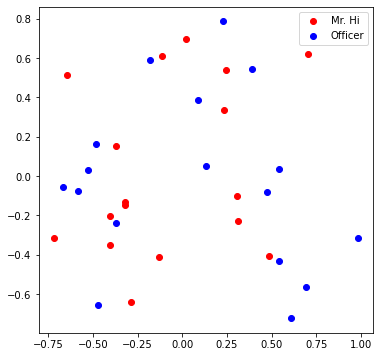

In [17]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [18]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  # print(pred)
  # print(label)
  preds = pred.round().int()
  labels = label.int()
  xor = preds.bitwise_xor(labels)
  correct = torch.where(xor == 0, 1,0)
  accu = torch.sum(correct) / pred.size()[0]
  accu = round(accu.item(), 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (6) Update the embeddings using the loss and optimizer 
  # (as a sanity check, the loss should decrease during training)

  epochs = 15000
  learning_rate = 0.15

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()
    # (1) Get the embeddings of the nodes in train_edge
    edge_embeddings = emb(train_edge)
    # (2) Dot product the embeddings between each node pair
    dot_prod = torch.sum(edge_embeddings[0] * edge_embeddings[1], dim=-1)
    # (3) Feed the dot product result into sigmoid
    sig = sigmoid(dot_prod)
    # (4) Feed the sigmoid output into the loss_fn
    loss = loss_fn(sig, train_label)
    # (5) Print both loss and accuracy of each epoch 
    loss.backward()
    optimizer.step()
    print(f"Loss for epoch {i} is: {loss}")
    print(f"Accuracy for epoch {i} Is: {accuracy(sig, train_label)}")
    # (6) Update the embeddings using the loss and optimizer 


    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)
# print(train_edge.int())

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
Loss for epoch 0 is: 1.9474648237228394
Accuracy for epoch 0 Is: 0.5
Loss for epoch 1 is: 1.928297758102417
Accuracy for epoch 1 Is: 0.5
Loss for epoch 2 is: 1.8923218250274658
Accuracy for epoch 2 Is: 0.5
Loss for epoch 3 is: 1.8420171737670898
Accuracy for epoch 3 Is: 0.5
Loss for epoch 4 is: 1.7799044847488403
Accuracy for epoch 4 Is: 0.5
Loss for epoch 5 is: 1.7084745168685913
Accuracy for epoch 5 Is: 0.5
Loss for epoch 6 is: 1.6301366090774536
Accuracy for epoch 6 Is: 0.5
Loss for epoch 7 is: 1.547174096107483
Accuracy for epoch 7 Is: 0.5
Loss for epoch 8 is: 1.4617047309875488
Accuracy for epoch 8 Is: 0.5
Loss for epoch 9 is: 1.3756475448608398
Accuracy for epoch 9 Is: 0.5
Loss for epoch 10 is: 1.290693998336792
Accuracy for epoch 10 Is: 0.5
Loss for epoch 11 is: 1.2082865238189697
Accuracy for epoch 11 Is: 0.5
Loss for epoch 12 is: 1.1296000480651855
Accuracy for epoch 12 Is: 0.5
Loss for epoch 13 is: 1.0555390119552612
Accuracy for epoch

Accuracy for epoch 181 Is: 1.0
Loss for epoch 182 is: 0.05170542746782303
Accuracy for epoch 182 Is: 1.0
Loss for epoch 183 is: 0.05116398632526398
Accuracy for epoch 183 Is: 1.0
Loss for epoch 184 is: 0.050631534308195114
Accuracy for epoch 184 Is: 1.0
Loss for epoch 185 is: 0.05010789632797241
Accuracy for epoch 185 Is: 1.0
Loss for epoch 186 is: 0.04959290474653244
Accuracy for epoch 186 Is: 1.0
Loss for epoch 187 is: 0.04908635839819908
Accuracy for epoch 187 Is: 1.0
Loss for epoch 188 is: 0.04858807846903801
Accuracy for epoch 188 Is: 1.0
Loss for epoch 189 is: 0.04809790477156639
Accuracy for epoch 189 Is: 1.0
Loss for epoch 190 is: 0.047615669667720795
Accuracy for epoch 190 Is: 1.0
Loss for epoch 191 is: 0.0471411868929863
Accuracy for epoch 191 Is: 1.0
Loss for epoch 192 is: 0.046674326062202454
Accuracy for epoch 192 Is: 1.0
Loss for epoch 193 is: 0.04621491581201553
Accuracy for epoch 193 Is: 1.0
Loss for epoch 194 is: 0.0457628034055233
Accuracy for epoch 194 Is: 1.0
Loss f

Accuracy for epoch 412 Is: 1.0
Loss for epoch 413 is: 0.012363312765955925
Accuracy for epoch 413 Is: 1.0
Loss for epoch 414 is: 0.012316420674324036
Accuracy for epoch 414 Is: 1.0
Loss for epoch 415 is: 0.01226984616369009
Accuracy for epoch 415 Is: 1.0
Loss for epoch 416 is: 0.012223584577441216
Accuracy for epoch 416 Is: 1.0
Loss for epoch 417 is: 0.012177632190287113
Accuracy for epoch 417 Is: 1.0
Loss for epoch 418 is: 0.01213198620826006
Accuracy for epoch 418 Is: 1.0
Loss for epoch 419 is: 0.012086642906069756
Accuracy for epoch 419 Is: 1.0
Loss for epoch 420 is: 0.012041599489748478
Accuracy for epoch 420 Is: 1.0
Loss for epoch 421 is: 0.01199685875326395
Accuracy for epoch 421 Is: 1.0
Loss for epoch 422 is: 0.011952407658100128
Accuracy for epoch 422 Is: 1.0
Loss for epoch 423 is: 0.011908256448805332
Accuracy for epoch 423 Is: 1.0
Loss for epoch 424 is: 0.011864394880831242
Accuracy for epoch 424 Is: 1.0
Loss for epoch 425 is: 0.01182081550359726
Accuracy for epoch 425 Is: 1.

Loss for epoch 647 is: 0.006300316192209721
Accuracy for epoch 647 Is: 1.0
Loss for epoch 648 is: 0.006286316551268101
Accuracy for epoch 648 Is: 1.0
Loss for epoch 649 is: 0.0062723709270358086
Accuracy for epoch 649 Is: 1.0
Loss for epoch 650 is: 0.0062584769912064075
Accuracy for epoch 650 Is: 1.0
Loss for epoch 651 is: 0.006244640797376633
Accuracy for epoch 651 Is: 1.0
Loss for epoch 652 is: 0.00623085955157876
Accuracy for epoch 652 Is: 1.0
Loss for epoch 653 is: 0.006217141170054674
Accuracy for epoch 653 Is: 1.0
Loss for epoch 654 is: 0.00620346749201417
Accuracy for epoch 654 Is: 1.0
Loss for epoch 655 is: 0.006189859937876463
Accuracy for epoch 655 Is: 1.0
Loss for epoch 656 is: 0.006176296155899763
Accuracy for epoch 656 Is: 1.0
Loss for epoch 657 is: 0.0061627887189388275
Accuracy for epoch 657 Is: 1.0
Loss for epoch 658 is: 0.006149337161332369
Accuracy for epoch 658 Is: 1.0
Loss for epoch 659 is: 0.00613592891022563
Accuracy for epoch 659 Is: 1.0
Loss for epoch 660 is: 0.

Accuracy for epoch 877 Is: 1.0
Loss for epoch 878 is: 0.004099151119589806
Accuracy for epoch 878 Is: 1.0
Loss for epoch 879 is: 0.004092726856470108
Accuracy for epoch 879 Is: 1.0
Loss for epoch 880 is: 0.004086323082447052
Accuracy for epoch 880 Is: 1.0
Loss for epoch 881 is: 0.004079936072230339
Accuracy for epoch 881 Is: 1.0
Loss for epoch 882 is: 0.004073568154126406
Accuracy for epoch 882 Is: 1.0
Loss for epoch 883 is: 0.0040672156028449535
Accuracy for epoch 883 Is: 1.0
Loss for epoch 884 is: 0.004060881678014994
Accuracy for epoch 884 Is: 1.0
Loss for epoch 885 is: 0.004054570104926825
Accuracy for epoch 885 Is: 1.0
Loss for epoch 886 is: 0.004048271104693413
Accuracy for epoch 886 Is: 1.0
Loss for epoch 887 is: 0.004041989799588919
Accuracy for epoch 887 Is: 1.0
Loss for epoch 888 is: 0.004035735968500376
Accuracy for epoch 888 Is: 1.0
Loss for epoch 889 is: 0.004029485397040844
Accuracy for epoch 889 Is: 1.0
Loss for epoch 890 is: 0.004023258108645678
Accuracy for epoch 890 I

Accuracy for epoch 1108 Is: 1.0
Loss for epoch 1109 is: 0.0029848944395780563
Accuracy for epoch 1109 Is: 1.0
Loss for epoch 1110 is: 0.0029812981374561787
Accuracy for epoch 1110 Is: 1.0
Loss for epoch 1111 is: 0.0029777006711810827
Accuracy for epoch 1111 Is: 1.0
Loss for epoch 1112 is: 0.002974113682284951
Accuracy for epoch 1112 Is: 1.0
Loss for epoch 1113 is: 0.0029705388005822897
Accuracy for epoch 1113 Is: 1.0
Loss for epoch 1114 is: 0.0029669671785086393
Accuracy for epoch 1114 Is: 1.0
Loss for epoch 1115 is: 0.0029634053353220224
Accuracy for epoch 1115 Is: 1.0
Loss for epoch 1116 is: 0.002959850011393428
Accuracy for epoch 1116 Is: 1.0
Loss for epoch 1117 is: 0.002956300973892212
Accuracy for epoch 1117 Is: 1.0
Loss for epoch 1118 is: 0.0029527638107538223
Accuracy for epoch 1118 Is: 1.0
Loss for epoch 1119 is: 0.0029492343310266733
Accuracy for epoch 1119 Is: 1.0
Loss for epoch 1120 is: 0.002945711137726903
Accuracy for epoch 1120 Is: 1.0
Loss for epoch 1121 is: 0.0029421953

Loss for epoch 1333 is: 0.0023384266532957554
Accuracy for epoch 1333 Is: 1.0
Loss for epoch 1334 is: 0.0023361321073025465
Accuracy for epoch 1334 Is: 1.0
Loss for epoch 1335 is: 0.002333821728825569
Accuracy for epoch 1335 Is: 1.0
Loss for epoch 1336 is: 0.0023315304424613714
Accuracy for epoch 1336 Is: 1.0
Loss for epoch 1337 is: 0.0023292391560971737
Accuracy for epoch 1337 Is: 1.0
Loss for epoch 1338 is: 0.002326955320313573
Accuracy for epoch 1338 Is: 1.0
Loss for epoch 1339 is: 0.0023246663622558117
Accuracy for epoch 1339 Is: 1.0
Loss for epoch 1340 is: 0.002322388580068946
Accuracy for epoch 1340 Is: 1.0
Loss for epoch 1341 is: 0.002320113591849804
Accuracy for epoch 1341 Is: 1.0
Loss for epoch 1342 is: 0.0023178430274128914
Accuracy for epoch 1342 Is: 1.0
Loss for epoch 1343 is: 0.002315577818080783
Accuracy for epoch 1343 Is: 1.0
Loss for epoch 1344 is: 0.002313317032530904
Accuracy for epoch 1344 Is: 1.0
Loss for epoch 1345 is: 0.002311058808118105
Accuracy for epoch 1345 I

Loss for epoch 1563 is: 0.0018999174935743213
Accuracy for epoch 1563 Is: 1.0
Loss for epoch 1564 is: 0.0018983411137014627
Accuracy for epoch 1564 Is: 1.0
Loss for epoch 1565 is: 0.0018967727664858103
Accuracy for epoch 1565 Is: 1.0
Loss for epoch 1566 is: 0.0018952044192701578
Accuracy for epoch 1566 Is: 1.0
Loss for epoch 1567 is: 0.001893638982437551
Accuracy for epoch 1567 Is: 1.0
Loss for epoch 1568 is: 0.001892073079943657
Accuracy for epoch 1568 Is: 1.0
Loss for epoch 1569 is: 0.0018905183533206582
Accuracy for epoch 1569 Is: 1.0
Loss for epoch 1570 is: 0.0018889561761170626
Accuracy for epoch 1570 Is: 1.0
Loss for epoch 1571 is: 0.0018873969092965126
Accuracy for epoch 1571 Is: 1.0
Loss for epoch 1572 is: 0.0018858460243791342
Accuracy for epoch 1572 Is: 1.0
Loss for epoch 1573 is: 0.0018842903664335608
Accuracy for epoch 1573 Is: 1.0
Loss for epoch 1574 is: 0.001882741111330688
Accuracy for epoch 1574 Is: 1.0
Loss for epoch 1575 is: 0.0018811967456713319
Accuracy for epoch 15

Accuracy for epoch 1778 Is: 1.0
Loss for epoch 1779 is: 0.0016081148060038686
Accuracy for epoch 1779 Is: 1.0
Loss for epoch 1780 is: 0.0016069505363702774
Accuracy for epoch 1780 Is: 1.0
Loss for epoch 1781 is: 0.0016057949978858232
Accuracy for epoch 1781 Is: 1.0
Loss for epoch 1782 is: 0.001604642253369093
Accuracy for epoch 1782 Is: 1.0
Loss for epoch 1783 is: 0.0016034907894209027
Accuracy for epoch 1783 Is: 1.0
Loss for epoch 1784 is: 0.001602339674718678
Accuracy for epoch 1784 Is: 1.0
Loss for epoch 1785 is: 0.0016011865809559822
Accuracy for epoch 1785 Is: 1.0
Loss for epoch 1786 is: 0.0016000412870198488
Accuracy for epoch 1786 Is: 1.0
Loss for epoch 1787 is: 0.001598893548361957
Accuracy for epoch 1787 Is: 1.0
Loss for epoch 1788 is: 0.001597750699147582
Accuracy for epoch 1788 Is: 1.0
Loss for epoch 1789 is: 0.0015966049395501614
Accuracy for epoch 1789 Is: 1.0
Loss for epoch 1790 is: 0.0015954632544890046
Accuracy for epoch 1790 Is: 1.0
Loss for epoch 1791 is: 0.0015943256

Accuracy for epoch 2004 Is: 1.0
Loss for epoch 2005 is: 0.0013806294882670045
Accuracy for epoch 2005 Is: 1.0
Loss for epoch 2006 is: 0.0013797564897686243
Accuracy for epoch 2006 Is: 1.0
Loss for epoch 2007 is: 0.0013788825599476695
Accuracy for epoch 2007 Is: 1.0
Loss for epoch 2008 is: 0.0013780088629573584
Accuracy for epoch 2008 Is: 1.0
Loss for epoch 2009 is: 0.0013771391240879893
Accuracy for epoch 2009 Is: 1.0
Loss for epoch 2010 is: 0.0013762720627710223
Accuracy for epoch 2010 Is: 1.0
Loss for epoch 2011 is: 0.0013754036044701934
Accuracy for epoch 2011 Is: 1.0
Loss for epoch 2012 is: 0.0013745372416451573
Accuracy for epoch 2012 Is: 1.0
Loss for epoch 2013 is: 0.0013736686669290066
Accuracy for epoch 2013 Is: 1.0
Loss for epoch 2014 is: 0.0013728002086281776
Accuracy for epoch 2014 Is: 1.0
Loss for epoch 2015 is: 0.0013719376875087619
Accuracy for epoch 2015 Is: 1.0
Loss for epoch 2016 is: 0.001371077261865139
Accuracy for epoch 2016 Is: 1.0
Loss for epoch 2017 is: 0.0013702

Accuracy for epoch 2229 Is: 1.0
Loss for epoch 2230 is: 0.0012068786891177297
Accuracy for epoch 2230 Is: 1.0
Loss for epoch 2231 is: 0.0012061933521181345
Accuracy for epoch 2231 Is: 1.0
Loss for epoch 2232 is: 0.0012055180268362164
Accuracy for epoch 2232 Is: 1.0
Loss for epoch 2233 is: 0.0012048343196511269
Accuracy for epoch 2233 Is: 1.0
Loss for epoch 2234 is: 0.001204160158522427
Accuracy for epoch 2234 Is: 1.0
Loss for epoch 2235 is: 0.0012034773826599121
Accuracy for epoch 2235 Is: 1.0
Loss for epoch 2236 is: 0.0012027989141643047
Accuracy for epoch 2236 Is: 1.0
Loss for epoch 2237 is: 0.0012021252186968923
Accuracy for epoch 2237 Is: 1.0
Loss for epoch 2238 is: 0.0012014467502012849
Accuracy for epoch 2238 Is: 1.0
Loss for epoch 2239 is: 0.0012007667683064938
Accuracy for epoch 2239 Is: 1.0
Loss for epoch 2240 is: 0.001200091908685863
Accuracy for epoch 2240 Is: 1.0
Loss for epoch 2241 is: 0.0011994194937869906
Accuracy for epoch 2241 Is: 1.0
Loss for epoch 2242 is: 0.00119874

Accuracy for epoch 2443 Is: 1.0
Loss for epoch 2444 is: 0.0010756806004792452
Accuracy for epoch 2444 Is: 1.0
Loss for epoch 2445 is: 0.001075129839591682
Accuracy for epoch 2445 Is: 1.0
Loss for epoch 2446 is: 0.0010745770996436477
Accuracy for epoch 2446 Is: 1.0
Loss for epoch 2447 is: 0.0010740297148004174
Accuracy for epoch 2447 Is: 1.0
Loss for epoch 2448 is: 0.0010734809329733253
Accuracy for epoch 2448 Is: 1.0
Loss for epoch 2449 is: 0.0010729312198236585
Accuracy for epoch 2449 Is: 1.0
Loss for epoch 2450 is: 0.0010723811574280262
Accuracy for epoch 2450 Is: 1.0
Loss for epoch 2451 is: 0.0010718329576775432
Accuracy for epoch 2451 Is: 1.0
Loss for epoch 2452 is: 0.0010712872026488185
Accuracy for epoch 2452 Is: 1.0
Loss for epoch 2453 is: 0.0010707391193136573
Accuracy for epoch 2453 Is: 1.0
Loss for epoch 2454 is: 0.001070194412022829
Accuracy for epoch 2454 Is: 1.0
Loss for epoch 2455 is: 0.0010696477256715298
Accuracy for epoch 2455 Is: 1.0
Loss for epoch 2456 is: 0.00106910

Loss for epoch 2679 is: 0.0009592024725861847
Accuracy for epoch 2679 Is: 1.0
Loss for epoch 2680 is: 0.0009587588720023632
Accuracy for epoch 2680 Is: 1.0
Loss for epoch 2681 is: 0.0009583096252754331
Accuracy for epoch 2681 Is: 1.0
Loss for epoch 2682 is: 0.000957862997893244
Accuracy for epoch 2682 Is: 1.0
Loss for epoch 2683 is: 0.0009574206196703017
Accuracy for epoch 2683 Is: 1.0
Loss for epoch 2684 is: 0.0009569785324856639
Accuracy for epoch 2684 Is: 1.0
Loss for epoch 2685 is: 0.0009565350483171642
Accuracy for epoch 2685 Is: 1.0
Loss for epoch 2686 is: 0.0009560900507494807
Accuracy for epoch 2686 Is: 1.0
Loss for epoch 2687 is: 0.0009556487202644348
Accuracy for epoch 2687 Is: 1.0
Loss for epoch 2688 is: 0.0009552048286423087
Accuracy for epoch 2688 Is: 1.0
Loss for epoch 2689 is: 0.0009547634399496019
Accuracy for epoch 2689 Is: 1.0
Loss for epoch 2690 is: 0.0009543242631480098
Accuracy for epoch 2690 Is: 1.0
Loss for epoch 2691 is: 0.0009538813028484583
Accuracy for epoch 

Accuracy for epoch 2911 Is: 1.0
Loss for epoch 2912 is: 0.0008648564107716084
Accuracy for epoch 2912 Is: 1.0
Loss for epoch 2913 is: 0.0008644895278848708
Accuracy for epoch 2913 Is: 1.0
Loss for epoch 2914 is: 0.0008641183376312256
Accuracy for epoch 2914 Is: 1.0
Loss for epoch 2915 is: 0.0008637532591819763
Accuracy for epoch 2915 Is: 1.0
Loss for epoch 2916 is: 0.000863385503180325
Accuracy for epoch 2916 Is: 1.0
Loss for epoch 2917 is: 0.0008630174561403692
Accuracy for epoch 2917 Is: 1.0
Loss for epoch 2918 is: 0.0008626517374068499
Accuracy for epoch 2918 Is: 1.0
Loss for epoch 2919 is: 0.0008622923633083701
Accuracy for epoch 2919 Is: 1.0
Loss for epoch 2920 is: 0.0008619174477644265
Accuracy for epoch 2920 Is: 1.0
Loss for epoch 2921 is: 0.0008615527767688036
Accuracy for epoch 2921 Is: 1.0
Loss for epoch 2922 is: 0.0008611914818175137
Accuracy for epoch 2922 Is: 1.0
Loss for epoch 2923 is: 0.0008608279749751091
Accuracy for epoch 2923 Is: 1.0
Loss for epoch 2924 is: 0.0008604

Loss for epoch 3147 is: 0.0007857740856707096
Accuracy for epoch 3147 Is: 1.0
Loss for epoch 3148 is: 0.0007854626746848226
Accuracy for epoch 3148 Is: 1.0
Loss for epoch 3149 is: 0.0007851646514609456
Accuracy for epoch 3149 Is: 1.0
Loss for epoch 3150 is: 0.0007848551613278687
Accuracy for epoch 3150 Is: 1.0
Loss for epoch 3151 is: 0.000784547533839941
Accuracy for epoch 3151 Is: 1.0
Loss for epoch 3152 is: 0.0007842372287996113
Accuracy for epoch 3152 Is: 1.0
Loss for epoch 3153 is: 0.0007839330355636775
Accuracy for epoch 3153 Is: 1.0
Loss for epoch 3154 is: 0.0007836261647753417
Accuracy for epoch 3154 Is: 1.0
Loss for epoch 3155 is: 0.0007833236013539135
Accuracy for epoch 3155 Is: 1.0
Loss for epoch 3156 is: 0.0007830186514183879
Accuracy for epoch 3156 Is: 1.0
Loss for epoch 3157 is: 0.0007827087538316846
Accuracy for epoch 3157 Is: 1.0
Loss for epoch 3158 is: 0.0007824065978638828
Accuracy for epoch 3158 Is: 1.0
Loss for epoch 3159 is: 0.0007820950704626739
Accuracy for epoch 

Loss for epoch 3378 is: 0.000720191455911845
Accuracy for epoch 3378 Is: 1.0
Loss for epoch 3379 is: 0.0007199305691756308
Accuracy for epoch 3379 Is: 1.0
Loss for epoch 3380 is: 0.0007196696824394166
Accuracy for epoch 3380 Is: 1.0
Loss for epoch 3381 is: 0.0007194095524027944
Accuracy for epoch 3381 Is: 1.0
Loss for epoch 3382 is: 0.0007191490149125457
Accuracy for epoch 3382 Is: 1.0
Loss for epoch 3383 is: 0.000718885101377964
Accuracy for epoch 3383 Is: 1.0
Loss for epoch 3384 is: 0.0007186229922808707
Accuracy for epoch 3384 Is: 1.0
Loss for epoch 3385 is: 0.0007183690322563052
Accuracy for epoch 3385 Is: 1.0
Loss for epoch 3386 is: 0.0007181031396612525
Accuracy for epoch 3386 Is: 1.0
Loss for epoch 3387 is: 0.0007178426021710038
Accuracy for epoch 3387 Is: 1.0
Loss for epoch 3388 is: 0.0007175817736424506
Accuracy for epoch 3388 Is: 1.0
Loss for epoch 3389 is: 0.000717323157005012
Accuracy for epoch 3389 Is: 1.0
Loss for epoch 3390 is: 0.0007170657045207918
Accuracy for epoch 33

Loss for epoch 3606 is: 0.0006647824193350971
Accuracy for epoch 3606 Is: 1.0
Loss for epoch 3607 is: 0.000664557097479701
Accuracy for epoch 3607 Is: 1.0
Loss for epoch 3608 is: 0.0006643277010880411
Accuracy for epoch 3608 Is: 1.0
Loss for epoch 3609 is: 0.0006641088402830064
Accuracy for epoch 3609 Is: 1.0
Loss for epoch 3610 is: 0.0006638793274760246
Accuracy for epoch 3610 Is: 1.0
Loss for epoch 3611 is: 0.0006636551697738469
Accuracy for epoch 3611 Is: 1.0
Loss for epoch 3612 is: 0.0006634302553720772
Accuracy for epoch 3612 Is: 1.0
Loss for epoch 3613 is: 0.000663205748423934
Accuracy for epoch 3613 Is: 1.0
Loss for epoch 3614 is: 0.0006629788549616933
Accuracy for epoch 3614 Is: 1.0
Loss for epoch 3615 is: 0.00066275434801355
Accuracy for epoch 3615 Is: 1.0
Loss for epoch 3616 is: 0.0006625314126722515
Accuracy for epoch 3616 Is: 1.0
Loss for epoch 3617 is: 0.0006623060908168554
Accuracy for epoch 3617 Is: 1.0
Loss for epoch 3618 is: 0.0006620791973546147
Accuracy for epoch 361

Accuracy for epoch 3838 Is: 1.0
Loss for epoch 3839 is: 0.0006158275064080954
Accuracy for epoch 3839 Is: 1.0
Loss for epoch 3840 is: 0.0006156309391371906
Accuracy for epoch 3840 Is: 1.0
Loss for epoch 3841 is: 0.000615436234511435
Accuracy for epoch 3841 Is: 1.0
Loss for epoch 3842 is: 0.0006152431597001851
Accuracy for epoch 3842 Is: 1.0
Loss for epoch 3843 is: 0.000615048804320395
Accuracy for epoch 3843 Is: 1.0
Loss for epoch 3844 is: 0.0006148540996946394
Accuracy for epoch 3844 Is: 1.0
Loss for epoch 3845 is: 0.0006146540981717408
Accuracy for epoch 3845 Is: 1.0
Loss for epoch 3846 is: 0.0006144617218524218
Accuracy for epoch 3846 Is: 1.0
Loss for epoch 3847 is: 0.0006142670172266662
Accuracy for epoch 3847 Is: 1.0
Loss for epoch 3848 is: 0.0006140681216493249
Accuracy for epoch 3848 Is: 1.0
Loss for epoch 3849 is: 0.0006138758035376668
Accuracy for epoch 3849 Is: 1.0
Loss for epoch 3850 is: 0.000613682612311095
Accuracy for epoch 3850 Is: 1.0
Loss for epoch 3851 is: 0.000613486

Loss for epoch 4072 is: 0.0005731874844059348
Accuracy for epoch 4072 Is: 1.0
Loss for epoch 4073 is: 0.000573010474909097
Accuracy for epoch 4073 Is: 1.0
Loss for epoch 4074 is: 0.0005728425458073616
Accuracy for epoch 4074 Is: 1.0
Loss for epoch 4075 is: 0.0005726742674596608
Accuracy for epoch 4075 Is: 1.0
Loss for epoch 4076 is: 0.0005724994116462767
Accuracy for epoch 4076 Is: 1.0
Loss for epoch 4077 is: 0.0005723308422602713
Accuracy for epoch 4077 Is: 1.0
Loss for epoch 4078 is: 0.0005721583147533238
Accuracy for epoch 4078 Is: 1.0
Loss for epoch 4079 is: 0.0005719870096072555
Accuracy for epoch 4079 Is: 1.0
Loss for epoch 4080 is: 0.00057181715965271
Accuracy for epoch 4080 Is: 1.0
Loss for epoch 4081 is: 0.0005716512096114457
Accuracy for epoch 4081 Is: 1.0
Loss for epoch 4082 is: 0.000571476761251688
Accuracy for epoch 4082 Is: 1.0
Loss for epoch 4083 is: 0.0005713081336580217
Accuracy for epoch 4083 Is: 1.0
Loss for epoch 4084 is: 0.0005711387493647635
Accuracy for epoch 408

Loss for epoch 4302 is: 0.0005361856310628355
Accuracy for epoch 4302 Is: 1.0
Loss for epoch 4303 is: 0.0005360348732210696
Accuracy for epoch 4303 Is: 1.0
Loss for epoch 4304 is: 0.0005358804482966661
Accuracy for epoch 4304 Is: 1.0
Loss for epoch 4305 is: 0.0005357358604669571
Accuracy for epoch 4305 Is: 1.0
Loss for epoch 4306 is: 0.0005355824832804501
Accuracy for epoch 4306 Is: 1.0
Loss for epoch 4307 is: 0.0005354287568479776
Accuracy for epoch 4307 Is: 1.0
Loss for epoch 4308 is: 0.0005352804437279701
Accuracy for epoch 4308 Is: 1.0
Loss for epoch 4309 is: 0.0005351270083338022
Accuracy for epoch 4309 Is: 1.0
Loss for epoch 4310 is: 0.0005349763669073582
Accuracy for epoch 4310 Is: 1.0
Loss for epoch 4311 is: 0.000534827180672437
Accuracy for epoch 4311 Is: 1.0
Loss for epoch 4312 is: 0.0005346765392459929
Accuracy for epoch 4312 Is: 1.0
Loss for epoch 4313 is: 0.0005345281679183245
Accuracy for epoch 4313 Is: 1.0
Loss for epoch 4314 is: 0.0005343732773326337
Accuracy for epoch 

Accuracy for epoch 4531 Is: 1.0
Loss for epoch 4532 is: 0.0005034050554968417
Accuracy for epoch 4532 Is: 1.0
Loss for epoch 4533 is: 0.0005032682092860341
Accuracy for epoch 4533 Is: 1.0
Loss for epoch 4534 is: 0.000503131712321192
Accuracy for epoch 4534 Is: 1.0
Loss for epoch 4535 is: 0.000502995157148689
Accuracy for epoch 4535 Is: 1.0
Loss for epoch 4536 is: 0.0005028651212342083
Accuracy for epoch 4536 Is: 1.0
Loss for epoch 4537 is: 0.0005027282168157399
Accuracy for epoch 4537 Is: 1.0
Loss for epoch 4538 is: 0.0005025943974032998
Accuracy for epoch 4538 Is: 1.0
Loss for epoch 4539 is: 0.0005024616839364171
Accuracy for epoch 4539 Is: 1.0
Loss for epoch 4540 is: 0.0005023297271691263
Accuracy for epoch 4540 Is: 1.0
Loss for epoch 4541 is: 0.0005021932302042842
Accuracy for epoch 4541 Is: 1.0
Loss for epoch 4542 is: 0.0005020612734369934
Accuracy for epoch 4542 Is: 1.0
Loss for epoch 4543 is: 0.0005019259988330305
Accuracy for epoch 4543 Is: 1.0
Loss for epoch 4544 is: 0.00050179

Accuracy for epoch 4761 Is: 1.0
Loss for epoch 4762 is: 0.0004741695593111217
Accuracy for epoch 4762 Is: 1.0
Loss for epoch 4763 is: 0.0004740495060104877
Accuracy for epoch 4763 Is: 1.0
Loss for epoch 4764 is: 0.0004739279393106699
Accuracy for epoch 4764 Is: 1.0
Loss for epoch 4765 is: 0.00047380782780237496
Accuracy for epoch 4765 Is: 1.0
Loss for epoch 4766 is: 0.00047368896775878966
Accuracy for epoch 4766 Is: 1.0
Loss for epoch 4767 is: 0.0004735681286547333
Accuracy for epoch 4767 Is: 1.0
Loss for epoch 4768 is: 0.000473449588753283
Accuracy for epoch 4768 Is: 1.0
Loss for epoch 4769 is: 0.000473327178042382
Accuracy for epoch 4769 Is: 1.0
Loss for epoch 4770 is: 0.0004732113447971642
Accuracy for epoch 4770 Is: 1.0
Loss for epoch 4771 is: 0.00047308861394412816
Accuracy for epoch 4771 Is: 1.0
Loss for epoch 4772 is: 0.0004729689098894596
Accuracy for epoch 4772 Is: 1.0
Loss for epoch 4773 is: 0.00047285115579143167
Accuracy for epoch 4773 Is: 1.0
Loss for epoch 4774 is: 0.0004

Loss for epoch 4987 is: 0.00044849238474853337
Accuracy for epoch 4987 Is: 1.0
Loss for epoch 4988 is: 0.0004483841476030648
Accuracy for epoch 4988 Is: 1.0
Loss for epoch 4989 is: 0.00044827783131040633
Accuracy for epoch 4989 Is: 1.0
Loss for epoch 4990 is: 0.000448170438176021
Accuracy for epoch 4990 Is: 1.0
Loss for epoch 4991 is: 0.0004480606294237077
Accuracy for epoch 4991 Is: 1.0
Loss for epoch 4992 is: 0.00044795399298891425
Accuracy for epoch 4992 Is: 1.0
Loss for epoch 4993 is: 0.00044784575584344566
Accuracy for epoch 4993 Is: 1.0
Loss for epoch 4994 is: 0.00044773987610824406
Accuracy for epoch 4994 Is: 1.0
Loss for epoch 4995 is: 0.000447631609858945
Accuracy for epoch 4995 Is: 1.0
Loss for epoch 4996 is: 0.00044752380927093327
Accuracy for epoch 4996 Is: 1.0
Loss for epoch 4997 is: 0.00044741257443092763
Accuracy for epoch 4997 Is: 1.0
Loss for epoch 4998 is: 0.00044730587978847325
Accuracy for epoch 4998 Is: 1.0
Loss for epoch 4999 is: 0.00044719764264300466
Accuracy fo

Accuracy for epoch 5200 Is: 1.0
Loss for epoch 5201 is: 0.00042637830483727157
Accuracy for epoch 5201 Is: 1.0
Loss for epoch 5202 is: 0.00042628191295079887
Accuracy for epoch 5202 Is: 1.0
Loss for epoch 5203 is: 0.00042617946746759117
Accuracy for epoch 5203 Is: 1.0
Loss for epoch 5204 is: 0.0004260842688381672
Accuracy for epoch 5204 Is: 1.0
Loss for epoch 5205 is: 0.00042598217260092497
Accuracy for epoch 5205 Is: 1.0
Loss for epoch 5206 is: 0.0004258865665178746
Accuracy for epoch 5206 Is: 1.0
Loss for epoch 5207 is: 0.00042578487773425877
Accuracy for epoch 5207 Is: 1.0
Loss for epoch 5208 is: 0.0004256877291481942
Accuracy for epoch 5208 Is: 1.0
Loss for epoch 5209 is: 0.0004255929379723966
Accuracy for epoch 5209 Is: 1.0
Loss for epoch 5210 is: 0.00042549276258796453
Accuracy for epoch 5210 Is: 1.0
Loss for epoch 5211 is: 0.0004253963998053223
Accuracy for epoch 5211 Is: 1.0
Loss for epoch 5212 is: 0.0004252958460710943
Accuracy for epoch 5212 Is: 1.0
Loss for epoch 5213 is: 0.

Accuracy for epoch 5436 Is: 1.0
Loss for epoch 5437 is: 0.0004042421351186931
Accuracy for epoch 5437 Is: 1.0
Loss for epoch 5438 is: 0.00040415607509203255
Accuracy for epoch 5438 Is: 1.0
Loss for epoch 5439 is: 0.0004040624189656228
Accuracy for epoch 5439 Is: 1.0
Loss for epoch 5440 is: 0.0004039771156385541
Accuracy for epoch 5440 Is: 1.0
Loss for epoch 5441 is: 0.00040388881461694837
Accuracy for epoch 5441 Is: 1.0
Loss for epoch 5442 is: 0.0004037974576931447
Accuracy for epoch 5442 Is: 1.0
Loss for epoch 5443 is: 0.00040370950591750443
Accuracy for epoch 5443 Is: 1.0
Loss for epoch 5444 is: 0.00040361963328905404
Accuracy for epoch 5444 Is: 1.0
Loss for epoch 5445 is: 0.0004035313322674483
Accuracy for epoch 5445 Is: 1.0
Loss for epoch 5446 is: 0.00040344148874282837
Accuracy for epoch 5446 Is: 1.0
Loss for epoch 5447 is: 0.0004033561854157597
Accuracy for epoch 5447 Is: 1.0
Loss for epoch 5448 is: 0.00040326558519154787
Accuracy for epoch 5448 Is: 1.0
Loss for epoch 5449 is: 0.

Accuracy for epoch 5669 Is: 1.0
Loss for epoch 5670 is: 0.0003844106395263225
Accuracy for epoch 5670 Is: 1.0
Loss for epoch 5671 is: 0.0003843288286589086
Accuracy for epoch 5671 Is: 1.0
Loss for epoch 5672 is: 0.0003842500736936927
Accuracy for epoch 5672 Is: 1.0
Loss for epoch 5673 is: 0.0003841651778202504
Accuracy for epoch 5673 Is: 1.0
Loss for epoch 5674 is: 0.00038408528780564666
Accuracy for epoch 5674 Is: 1.0
Loss for epoch 5675 is: 0.00038400193443521857
Accuracy for epoch 5675 Is: 1.0
Loss for epoch 5676 is: 0.00038392358692362905
Accuracy for epoch 5676 Is: 1.0
Loss for epoch 5677 is: 0.0003838413394987583
Accuracy for epoch 5677 Is: 1.0
Loss for epoch 5678 is: 0.0003837633703369647
Accuracy for epoch 5678 Is: 1.0
Loss for epoch 5679 is: 0.00038367617526091635
Accuracy for epoch 5679 Is: 1.0
Loss for epoch 5680 is: 0.0003835978277493268
Accuracy for epoch 5680 Is: 1.0
Loss for epoch 5681 is: 0.0003835186653304845
Accuracy for epoch 5681 Is: 1.0
Loss for epoch 5682 is: 0.00

Accuracy for epoch 5903 Is: 1.0
Loss for epoch 5904 is: 0.00036624446511268616
Accuracy for epoch 5904 Is: 1.0
Loss for epoch 5905 is: 0.0003661699593067169
Accuracy for epoch 5905 Is: 1.0
Loss for epoch 5906 is: 0.00036609882954508066
Accuracy for epoch 5906 Is: 1.0
Loss for epoch 5907 is: 0.0003660231304820627
Accuracy for epoch 5907 Is: 1.0
Loss for epoch 5908 is: 0.0003659470530692488
Accuracy for epoch 5908 Is: 1.0
Loss for epoch 5909 is: 0.00036587516660802066
Accuracy for epoch 5909 Is: 1.0
Loss for epoch 5910 is: 0.00036579949664883316
Accuracy for epoch 5910 Is: 1.0
Loss for epoch 5911 is: 0.000365728308679536
Accuracy for epoch 5911 Is: 1.0
Loss for epoch 5912 is: 0.0003656545595731586
Accuracy for epoch 5912 Is: 1.0
Loss for epoch 5913 is: 0.0003655773471109569
Accuracy for epoch 5913 Is: 1.0
Loss for epoch 5914 is: 0.0003655054606497288
Accuracy for epoch 5914 Is: 1.0
Loss for epoch 5915 is: 0.00036542859743349254
Accuracy for epoch 5915 Is: 1.0
Loss for epoch 5916 is: 0.00

Accuracy for epoch 6118 Is: 1.0
Loss for epoch 6119 is: 0.0003509152156766504
Accuracy for epoch 6119 Is: 1.0
Loss for epoch 6120 is: 0.0003508552326820791
Accuracy for epoch 6120 Is: 1.0
Loss for epoch 6121 is: 0.0003507844521664083
Accuracy for epoch 6121 Is: 1.0
Loss for epoch 6122 is: 0.0003507171932142228
Accuracy for epoch 6122 Is: 1.0
Loss for epoch 6123 is: 0.000350646092556417
Accuracy for epoch 6123 Is: 1.0
Loss for epoch 6124 is: 0.0003505803470034152
Accuracy for epoch 6124 Is: 1.0
Loss for epoch 6125 is: 0.00035050956648774445
Accuracy for epoch 6125 Is: 1.0
Loss for epoch 6126 is: 0.00035044155083596706
Accuracy for epoch 6126 Is: 1.0
Loss for epoch 6127 is: 0.0003503730986267328
Accuracy for epoch 6127 Is: 1.0
Loss for epoch 6128 is: 0.0003502997278701514
Accuracy for epoch 6128 Is: 1.0
Loss for epoch 6129 is: 0.00035023584496229887
Accuracy for epoch 6129 Is: 1.0
Loss for epoch 6130 is: 0.0003501689643599093
Accuracy for epoch 6130 Is: 1.0
Loss for epoch 6131 is: 0.0003

Accuracy for epoch 6339 Is: 1.0
Loss for epoch 6340 is: 0.0003363723517395556
Accuracy for epoch 6340 Is: 1.0
Loss for epoch 6341 is: 0.00033630928373895586
Accuracy for epoch 6341 Is: 1.0
Loss for epoch 6342 is: 0.0003362454299349338
Accuracy for epoch 6342 Is: 1.0
Loss for epoch 6343 is: 0.00033618733868934214
Accuracy for epoch 6343 Is: 1.0
Loss for epoch 6344 is: 0.0003361177514307201
Accuracy for epoch 6344 Is: 1.0
Loss for epoch 6345 is: 0.00033605771022848785
Accuracy for epoch 6345 Is: 1.0
Loss for epoch 6346 is: 0.00033599426387809217
Accuracy for epoch 6346 Is: 1.0
Loss for epoch 6347 is: 0.000335930468281731
Accuracy for epoch 6347 Is: 1.0
Loss for epoch 6348 is: 0.00033586277277208865
Accuracy for epoch 6348 Is: 1.0
Loss for epoch 6349 is: 0.00033580465242266655
Accuracy for epoch 6349 Is: 1.0
Loss for epoch 6350 is: 0.0003357446112204343
Accuracy for epoch 6350 Is: 1.0
Loss for epoch 6351 is: 0.0003356727829668671
Accuracy for epoch 6351 Is: 1.0
Loss for epoch 6352 is: 0.0

Accuracy for epoch 6563 Is: 1.0
Loss for epoch 6564 is: 0.00032273432589136064
Accuracy for epoch 6564 Is: 1.0
Loss for epoch 6565 is: 0.00032267472124658525
Accuracy for epoch 6565 Is: 1.0
Loss for epoch 6566 is: 0.00032261392334476113
Accuracy for epoch 6566 Is: 1.0
Loss for epoch 6567 is: 0.000322561216307804
Accuracy for epoch 6567 Is: 1.0
Loss for epoch 6568 is: 0.0003225012042094022
Accuracy for epoch 6568 Is: 1.0
Loss for epoch 6569 is: 0.00032244270551018417
Accuracy for epoch 6569 Is: 1.0
Loss for epoch 6570 is: 0.00032238761195912957
Accuracy for epoch 6570 Is: 1.0
Loss for epoch 6571 is: 0.00032232722151093185
Accuracy for epoch 6571 Is: 1.0
Loss for epoch 6572 is: 0.0003222706727683544
Accuracy for epoch 6572 Is: 1.0
Loss for epoch 6573 is: 0.00032221176661551
Accuracy for epoch 6573 Is: 1.0
Loss for epoch 6574 is: 0.00032215137616731226
Accuracy for epoch 6574 Is: 1.0
Loss for epoch 6575 is: 0.0003220913640689105
Accuracy for epoch 6575 Is: 1.0
Loss for epoch 6576 is: 0.00

Accuracy for epoch 6796 Is: 1.0
Loss for epoch 6797 is: 0.00030960931326262653
Accuracy for epoch 6797 Is: 1.0
Loss for epoch 6798 is: 0.00030955657712183893
Accuracy for epoch 6798 Is: 1.0
Loss for epoch 6799 is: 0.00030949999927543104
Accuracy for epoch 6799 Is: 1.0
Loss for epoch 6800 is: 0.00030944726313464344
Accuracy for epoch 6800 Is: 1.0
Loss for epoch 6801 is: 0.00030938987038098276
Accuracy for epoch 6801 Is: 1.0
Loss for epoch 6802 is: 0.0003093401901423931
Accuracy for epoch 6802 Is: 1.0
Loss for epoch 6803 is: 0.00030928285559639335
Accuracy for epoch 6803 Is: 1.0
Loss for epoch 6804 is: 0.00030923011945560575
Accuracy for epoch 6804 Is: 1.0
Loss for epoch 6805 is: 0.00030917927506379783
Accuracy for epoch 6805 Is: 1.0
Loss for epoch 6806 is: 0.0003091207763645798
Accuracy for epoch 6806 Is: 1.0
Loss for epoch 6807 is: 0.0003090706595685333
Accuracy for epoch 6807 Is: 1.0
Loss for epoch 6808 is: 0.00030901527497917414
Accuracy for epoch 6808 Is: 1.0
Loss for epoch 6809 is:

Accuracy for epoch 7030 Is: 1.0
Loss for epoch 7031 is: 0.0002974070084746927
Accuracy for epoch 7031 Is: 1.0
Loss for epoch 7032 is: 0.0002973538648802787
Accuracy for epoch 7032 Is: 1.0
Loss for epoch 7033 is: 0.00029730339883826673
Accuracy for epoch 7033 Is: 1.0
Loss for epoch 7034 is: 0.00029725866625085473
Accuracy for epoch 7034 Is: 1.0
Loss for epoch 7035 is: 0.00029720322345383465
Accuracy for epoch 7035 Is: 1.0
Loss for epoch 7036 is: 0.00029715814162045717
Accuracy for epoch 7036 Is: 1.0
Loss for epoch 7037 is: 0.0002971049980260432
Accuracy for epoch 7037 Is: 1.0
Loss for epoch 7038 is: 0.00029705112683586776
Accuracy for epoch 7038 Is: 1.0
Loss for epoch 7039 is: 0.00029700444429181516
Accuracy for epoch 7039 Is: 1.0
Loss for epoch 7040 is: 0.0002969520865008235
Accuracy for epoch 7040 Is: 1.0
Loss for epoch 7041 is: 0.00029690543306060135
Accuracy for epoch 7041 Is: 1.0
Loss for epoch 7042 is: 0.0002968504268210381
Accuracy for epoch 7042 Is: 1.0
Loss for epoch 7043 is: 0

Accuracy for epoch 7261 Is: 1.0
Loss for epoch 7262 is: 0.0002862037508748472
Accuracy for epoch 7262 Is: 1.0
Loss for epoch 7263 is: 0.0002861613465938717
Accuracy for epoch 7263 Is: 1.0
Loss for epoch 7264 is: 0.00028611242305487394
Accuracy for epoch 7264 Is: 1.0
Loss for epoch 7265 is: 0.00028606923297047615
Accuracy for epoch 7265 Is: 1.0
Loss for epoch 7266 is: 0.00028601917438209057
Accuracy for epoch 7266 Is: 1.0
Loss for epoch 7267 is: 0.00028597141499631107
Accuracy for epoch 7267 Is: 1.0
Loss for epoch 7268 is: 0.00028592394664883614
Accuracy for epoch 7268 Is: 1.0
Loss for epoch 7269 is: 0.00028588229906745255
Accuracy for epoch 7269 Is: 1.0
Loss for epoch 7270 is: 0.0002858322113752365
Accuracy for epoch 7270 Is: 1.0
Loss for epoch 7271 is: 0.00028578596538864076
Accuracy for epoch 7271 Is: 1.0
Loss for epoch 7272 is: 0.0002857393410522491
Accuracy for epoch 7272 Is: 1.0
Loss for epoch 7273 is: 0.0002856965293176472
Accuracy for epoch 7273 Is: 1.0
Loss for epoch 7274 is: 0

Accuracy for epoch 7495 Is: 1.0
Loss for epoch 7496 is: 0.00027564718038775027
Accuracy for epoch 7496 Is: 1.0
Loss for epoch 7497 is: 0.0002756055328063667
Accuracy for epoch 7497 Is: 1.0
Loss for epoch 7498 is: 0.00027555468841455877
Accuracy for epoch 7498 Is: 1.0
Loss for epoch 7499 is: 0.0002755179884843528
Accuracy for epoch 7499 Is: 1.0
Loss for epoch 7500 is: 0.00027547249919734895
Accuracy for epoch 7500 Is: 1.0
Loss for epoch 7501 is: 0.0002754255256149918
Accuracy for epoch 7501 Is: 1.0
Loss for epoch 7502 is: 0.0002753841981757432
Accuracy for epoch 7502 Is: 1.0
Loss for epoch 7503 is: 0.00027533600223250687
Accuracy for epoch 7503 Is: 1.0
Loss for epoch 7504 is: 0.00027530125225894153
Accuracy for epoch 7504 Is: 1.0
Loss for epoch 7505 is: 0.0002752545988187194
Accuracy for epoch 7505 Is: 1.0
Loss for epoch 7506 is: 0.00027521103038452566
Accuracy for epoch 7506 Is: 1.0
Loss for epoch 7507 is: 0.00027516900445334613
Accuracy for epoch 7507 Is: 1.0
Loss for epoch 7508 is: 0

Loss for epoch 7730 is: 0.0002657899458426982
Accuracy for epoch 7730 Is: 1.0
Loss for epoch 7731 is: 0.00026575170340947807
Accuracy for epoch 7731 Is: 1.0
Loss for epoch 7732 is: 0.0002657096483744681
Accuracy for epoch 7732 Is: 1.0
Loss for epoch 7733 is: 0.0002656702999956906
Accuracy for epoch 7733 Is: 1.0
Loss for epoch 7734 is: 0.0002656285942066461
Accuracy for epoch 7734 Is: 1.0
Loss for epoch 7735 is: 0.0002655846474226564
Accuracy for epoch 7735 Is: 1.0
Loss for epoch 7736 is: 0.00026554681244306266
Accuracy for epoch 7736 Is: 1.0
Loss for epoch 7737 is: 0.0002655062999110669
Accuracy for epoch 7737 Is: 1.0
Loss for epoch 7738 is: 0.00026546692242845893
Accuracy for epoch 7738 Is: 1.0
Loss for epoch 7739 is: 0.00026542486739344895
Accuracy for epoch 7739 Is: 1.0
Loss for epoch 7740 is: 0.0002653828414622694
Accuracy for epoch 7740 Is: 1.0
Loss for epoch 7741 is: 0.00026534267817623913
Accuracy for epoch 7741 Is: 1.0
Loss for epoch 7742 is: 0.0002653075207490474
Accuracy for 

Accuracy for epoch 7960 Is: 1.0
Loss for epoch 7961 is: 0.00025669732713140547
Accuracy for epoch 7961 Is: 1.0
Loss for epoch 7962 is: 0.00025665719294920564
Accuracy for epoch 7962 Is: 1.0
Loss for epoch 7963 is: 0.00025661784457042813
Accuracy for epoch 7963 Is: 1.0
Loss for epoch 7964 is: 0.00025657692458480597
Accuracy for epoch 7964 Is: 1.0
Loss for epoch 7965 is: 0.00025653946795500815
Accuracy for epoch 7965 Is: 1.0
Loss for epoch 7966 is: 0.00025649857707321644
Accuracy for epoch 7966 Is: 1.0
Loss for epoch 7967 is: 0.00025646263384260237
Accuracy for epoch 7967 Is: 1.0
Loss for epoch 7968 is: 0.0002564266906119883
Accuracy for epoch 7968 Is: 1.0
Loss for epoch 7969 is: 0.00025638772058300674
Accuracy for epoch 7969 Is: 1.0
Loss for epoch 7970 is: 0.0002563483431003988
Accuracy for epoch 7970 Is: 1.0
Loss for epoch 7971 is: 0.0002563089656177908
Accuracy for epoch 7971 Is: 1.0
Loss for epoch 7972 is: 0.0002562726440373808
Accuracy for epoch 7972 Is: 1.0
Loss for epoch 7973 is: 

Accuracy for epoch 8188 Is: 1.0
Loss for epoch 8189 is: 0.00024826385197229683
Accuracy for epoch 8189 Is: 1.0
Loss for epoch 8190 is: 0.00024822980049066246
Accuracy for epoch 8190 Is: 1.0
Loss for epoch 8191 is: 0.00024819618556648493
Accuracy for epoch 8191 Is: 1.0
Loss for epoch 8192 is: 0.00024815797223709524
Accuracy for epoch 8192 Is: 1.0
Loss for epoch 8193 is: 0.000248120108153671
Accuracy for epoch 8193 Is: 1.0
Loss for epoch 8194 is: 0.0002480803814250976
Accuracy for epoch 8194 Is: 1.0
Loss for epoch 8195 is: 0.00024805209250189364
Accuracy for epoch 8195 Is: 1.0
Loss for epoch 8196 is: 0.0002480146358720958
Accuracy for epoch 8196 Is: 1.0
Loss for epoch 8197 is: 0.000247977179242298
Accuracy for epoch 8197 Is: 1.0
Loss for epoch 8198 is: 0.00024794426281005144
Accuracy for epoch 8198 Is: 1.0
Loss for epoch 8199 is: 0.00024790872703306377
Accuracy for epoch 8199 Is: 1.0
Loss for epoch 8200 is: 0.00024786937865428627
Accuracy for epoch 8200 Is: 1.0
Loss for epoch 8201 is: 0.

Accuracy for epoch 8418 Is: 1.0
Loss for epoch 8419 is: 0.00024027579638641328
Accuracy for epoch 8419 Is: 1.0
Loss for epoch 8420 is: 0.00024024561571422964
Accuracy for epoch 8420 Is: 1.0
Loss for epoch 8421 is: 0.00024021003628149629
Accuracy for epoch 8421 Is: 1.0
Loss for epoch 8422 is: 0.0002401760284556076
Accuracy for epoch 8422 Is: 1.0
Loss for epoch 8423 is: 0.00024014317023102194
Accuracy for epoch 8423 Is: 1.0
Loss for epoch 8424 is: 0.00024010761990211904
Accuracy for epoch 8424 Is: 1.0
Loss for epoch 8425 is: 0.00024007131287362427
Accuracy for epoch 8425 Is: 1.0
Loss for epoch 8426 is: 0.00024004187434911728
Accuracy for epoch 8426 Is: 1.0
Loss for epoch 8427 is: 0.00024000478151720017
Accuracy for epoch 8427 Is: 1.0
Loss for epoch 8428 is: 0.0002399700169917196
Accuracy for epoch 8428 Is: 1.0
Loss for epoch 8429 is: 0.00023994057846721262
Accuracy for epoch 8429 Is: 1.0
Loss for epoch 8430 is: 0.00023990962654352188
Accuracy for epoch 8430 Is: 1.0
Loss for epoch 8431 is

Accuracy for epoch 8650 Is: 1.0
Loss for epoch 8651 is: 0.00023269648954737931
Accuracy for epoch 8651 Is: 1.0
Loss for epoch 8652 is: 0.00023266243806574494
Accuracy for epoch 8652 Is: 1.0
Loss for epoch 8653 is: 0.00023263339244294912
Accuracy for epoch 8653 Is: 1.0
Loss for epoch 8654 is: 0.00023259900626726449
Accuracy for epoch 8654 Is: 1.0
Loss for epoch 8655 is: 0.00023256306303665042
Accuracy for epoch 8655 Is: 1.0
Loss for epoch 8656 is: 0.00023253670951817185
Accuracy for epoch 8656 Is: 1.0
Loss for epoch 8657 is: 0.00023250191588886082
Accuracy for epoch 8657 Is: 1.0
Loss for epoch 8658 is: 0.00023246828641276807
Accuracy for epoch 8658 Is: 1.0
Loss for epoch 8659 is: 0.0002324411179870367
Accuracy for epoch 8659 Is: 1.0
Loss for epoch 8660 is: 0.00023240939481183887
Accuracy for epoch 8660 Is: 1.0
Loss for epoch 8661 is: 0.00023237845744006336
Accuracy for epoch 8661 Is: 1.0
Loss for epoch 8662 is: 0.00023234557011164725
Accuracy for epoch 8662 Is: 1.0
Loss for epoch 8663 i

Accuracy for epoch 8887 Is: 1.0
Loss for epoch 8888 is: 0.00022540312784258276
Accuracy for epoch 8888 Is: 1.0
Loss for epoch 8889 is: 0.00022537025506608188
Accuracy for epoch 8889 Is: 1.0
Loss for epoch 8890 is: 0.00022533930314239115
Accuracy for epoch 8890 Is: 1.0
Loss for epoch 8891 is: 0.00022531446302309632
Accuracy for epoch 8891 Is: 1.0
Loss for epoch 8892 is: 0.00022528615954797715
Accuracy for epoch 8892 Is: 1.0
Loss for epoch 8893 is: 0.00022525177337229252
Accuracy for epoch 8893 Is: 1.0
Loss for epoch 8894 is: 0.00022522157814819366
Accuracy for epoch 8894 Is: 1.0
Loss for epoch 8895 is: 0.00022519062622450292
Accuracy for epoch 8895 Is: 1.0
Loss for epoch 8896 is: 0.00022516422905027866
Accuracy for epoch 8896 Is: 1.0
Loss for epoch 8897 is: 0.0002251340338261798
Accuracy for epoch 8897 Is: 1.0
Loss for epoch 8898 is: 0.00022510193230118603
Accuracy for epoch 8898 Is: 1.0
Loss for epoch 8899 is: 0.0002250709803774953
Accuracy for epoch 8899 Is: 1.0
Loss for epoch 8900 is

Loss for epoch 9121 is: 0.00021863736037630588
Accuracy for epoch 9121 Is: 1.0
Loss for epoch 9122 is: 0.00021860678680241108
Accuracy for epoch 9122 Is: 1.0
Loss for epoch 9123 is: 0.00021857964748051018
Accuracy for epoch 9123 Is: 1.0
Loss for epoch 9124 is: 0.00021854984515812248
Accuracy for epoch 9124 Is: 1.0
Loss for epoch 9125 is: 0.00021852421923540533
Accuracy for epoch 9125 Is: 1.0
Loss for epoch 9126 is: 0.00021849249606020749
Accuracy for epoch 9126 Is: 1.0
Loss for epoch 9127 is: 0.00021847107564099133
Accuracy for epoch 9127 Is: 1.0
Loss for epoch 9128 is: 0.00021844127331860363
Accuracy for epoch 9128 Is: 1.0
Loss for epoch 9129 is: 0.00021841260604560375
Accuracy for epoch 9129 Is: 1.0
Loss for epoch 9130 is: 0.00021838280372321606
Accuracy for epoch 9130 Is: 1.0
Loss for epoch 9131 is: 0.00021835679945070297
Accuracy for epoch 9131 Is: 1.0
Loss for epoch 9132 is: 0.00021832813217770308
Accuracy for epoch 9132 Is: 1.0
Loss for epoch 9133 is: 0.00021829984325449914
Accur

Accuracy for epoch 9355 Is: 1.0
Loss for epoch 9356 is: 0.00021218699112068862
Accuracy for epoch 9356 Is: 1.0
Loss for epoch 9357 is: 0.00021216557070147246
Accuracy for epoch 9357 Is: 1.0
Loss for epoch 9358 is: 0.0002121342404279858
Accuracy for epoch 9358 Is: 1.0
Loss for epoch 9359 is: 0.00021210826525930315
Accuracy for epoch 9359 Is: 1.0
Loss for epoch 9360 is: 0.00021208226098679006
Accuracy for epoch 9360 Is: 1.0
Loss for epoch 9361 is: 0.00021205666416790336
Accuracy for epoch 9361 Is: 1.0
Loss for epoch 9362 is: 0.0002120310382451862
Accuracy for epoch 9362 Is: 1.0
Loss for epoch 9363 is: 0.00021200352057348937
Accuracy for epoch 9363 Is: 1.0
Loss for epoch 9364 is: 0.00021197754540480673
Accuracy for epoch 9364 Is: 1.0
Loss for epoch 9365 is: 0.00021194886357989162
Accuracy for epoch 9365 Is: 1.0
Loss for epoch 9366 is: 0.00021192517306189984
Accuracy for epoch 9366 Is: 1.0
Loss for epoch 9367 is: 0.00021189804829191417
Accuracy for epoch 9367 Is: 1.0
Loss for epoch 9368 is

Accuracy for epoch 9588 Is: 1.0
Loss for epoch 9589 is: 0.00020614414825104177
Accuracy for epoch 9589 Is: 1.0
Loss for epoch 9590 is: 0.00020611356012523174
Accuracy for epoch 9590 Is: 1.0
Loss for epoch 9591 is: 0.00020608946215361357
Accuracy for epoch 9591 Is: 1.0
Loss for epoch 9592 is: 0.00020606500038411468
Accuracy for epoch 9592 Is: 1.0
Loss for epoch 9593 is: 0.00020604360906872898
Accuracy for epoch 9593 Is: 1.0
Loss for epoch 9594 is: 0.0002060145779978484
Accuracy for epoch 9594 Is: 1.0
Loss for epoch 9595 is: 0.0002059882099274546
Accuracy for epoch 9595 Is: 1.0
Loss for epoch 9596 is: 0.00020596526155713946
Accuracy for epoch 9596 Is: 1.0
Loss for epoch 9597 is: 0.00020594193483702838
Accuracy for epoch 9597 Is: 1.0
Loss for epoch 9598 is: 0.00020591594511643052
Accuracy for epoch 9598 Is: 1.0
Loss for epoch 9599 is: 0.00020589034829754382
Accuracy for epoch 9599 Is: 1.0
Loss for epoch 9600 is: 0.0002058662794297561
Accuracy for epoch 9600 Is: 1.0
Loss for epoch 9601 is:

Loss for epoch 9819 is: 0.00020048086298629642
Accuracy for epoch 9819 Is: 1.0
Loss for epoch 9820 is: 0.00020045947167091072
Accuracy for epoch 9820 Is: 1.0
Loss for epoch 9821 is: 0.00020043615950271487
Accuracy for epoch 9821 Is: 1.0
Loss for epoch 9822 is: 0.00020041018433403224
Accuracy for epoch 9822 Is: 1.0
Loss for epoch 9823 is: 0.00020038649381604046
Accuracy for epoch 9823 Is: 1.0
Loss for epoch 9824 is: 0.00020036048954352736
Accuracy for epoch 9824 Is: 1.0
Loss for epoch 9825 is: 0.00020033564942423254
Accuracy for epoch 9825 Is: 1.0
Loss for epoch 9826 is: 0.00020031729945912957
Accuracy for epoch 9826 Is: 1.0
Loss for epoch 9827 is: 0.00020028787548653781
Accuracy for epoch 9827 Is: 1.0
Loss for epoch 9828 is: 0.0002002664696192369
Accuracy for epoch 9828 Is: 1.0
Loss for epoch 9829 is: 0.00020024352124892175
Accuracy for epoch 9829 Is: 1.0
Loss for epoch 9830 is: 0.00020021790987811983
Accuracy for epoch 9830 Is: 1.0
Loss for epoch 9831 is: 0.00020019346266053617
Accura

Accuracy for epoch 10052 Is: 1.0
Loss for epoch 10053 is: 0.00019501795759424567
Accuracy for epoch 10053 Is: 1.0
Loss for epoch 10054 is: 0.0001949938596226275
Accuracy for epoch 10054 Is: 1.0
Loss for epoch 10055 is: 0.00019497094035614282
Accuracy for epoch 10055 Is: 1.0
Loss for epoch 10056 is: 0.00019494915613904595
Accuracy for epoch 10056 Is: 1.0
Loss for epoch 10057 is: 0.00019492240971885622
Accuracy for epoch 10057 Is: 1.0
Loss for epoch 10058 is: 0.00019490064005367458
Accuracy for epoch 10058 Is: 1.0
Loss for epoch 10059 is: 0.00019487959798425436
Accuracy for epoch 10059 Is: 1.0
Loss for epoch 10060 is: 0.0001948612480191514
Accuracy for epoch 10060 Is: 1.0
Loss for epoch 10061 is: 0.00019483602955006063
Accuracy for epoch 10061 Is: 1.0
Loss for epoch 10062 is: 0.00019481271738186479
Accuracy for epoch 10062 Is: 1.0
Loss for epoch 10063 is: 0.00019478633475955576
Accuracy for epoch 10063 Is: 1.0
Loss for epoch 10064 is: 0.00019476226589176804
Accuracy for epoch 10064 Is: 1

Accuracy for epoch 10286 Is: 1.0
Loss for epoch 10287 is: 0.00018982606707140803
Accuracy for epoch 10287 Is: 1.0
Loss for epoch 10288 is: 0.0001898000919027254
Accuracy for epoch 10288 Is: 1.0
Loss for epoch 10289 is: 0.0001897805923363194
Accuracy for epoch 10289 Is: 1.0
Loss for epoch 10290 is: 0.0001897629990708083
Accuracy for epoch 10290 Is: 1.0
Loss for epoch 10291 is: 0.00018973700935021043
Accuracy for epoch 10291 Is: 1.0
Loss for epoch 10292 is: 0.0001897171459859237
Accuracy for epoch 10292 Is: 1.0
Loss for epoch 10293 is: 0.00018969574011862278
Accuracy for epoch 10293 Is: 1.0
Loss for epoch 10294 is: 0.00018967203504871577
Accuracy for epoch 10294 Is: 1.0
Loss for epoch 10295 is: 0.00018965064373333007
Accuracy for epoch 10295 Is: 1.0
Loss for epoch 10296 is: 0.00018963303591590375
Accuracy for epoch 10296 Is: 1.0
Loss for epoch 10297 is: 0.00018961164460051805
Accuracy for epoch 10297 Is: 1.0
Loss for epoch 10298 is: 0.00018958757573273033
Accuracy for epoch 10298 Is: 1.0

Accuracy for epoch 10520 Is: 1.0
Loss for epoch 10521 is: 0.0001848891406552866
Accuracy for epoch 10521 Is: 1.0
Loss for epoch 10522 is: 0.00018486850603949279
Accuracy for epoch 10522 Is: 1.0
Loss for epoch 10523 is: 0.000184849021025002
Accuracy for epoch 10523 Is: 1.0
Loss for epoch 10524 is: 0.00018482912855688483
Accuracy for epoch 10524 Is: 1.0
Loss for epoch 10525 is: 0.00018480543803889304
Accuracy for epoch 10525 Is: 1.0
Loss for epoch 10526 is: 0.00018478251877240837
Accuracy for epoch 10526 Is: 1.0
Loss for epoch 10527 is: 0.0001847641688073054
Accuracy for epoch 10527 Is: 1.0
Loss for epoch 10528 is: 0.00018474506214261055
Accuracy for epoch 10528 Is: 1.0
Loss for epoch 10529 is: 0.00018472288502380252
Accuracy for epoch 10529 Is: 1.0
Loss for epoch 10530 is: 0.00018470187205821276
Accuracy for epoch 10530 Is: 1.0
Loss for epoch 10531 is: 0.00018468505004420877
Accuracy for epoch 10531 Is: 1.0
Loss for epoch 10532 is: 0.00018466135952621698
Accuracy for epoch 10532 Is: 1.0

Accuracy for epoch 10756 Is: 1.0
Loss for epoch 10757 is: 0.0001801422331482172
Accuracy for epoch 10757 Is: 1.0
Loss for epoch 10758 is: 0.0001801254111342132
Accuracy for epoch 10758 Is: 1.0
Loss for epoch 10759 is: 0.00018010323401540518
Accuracy for epoch 10759 Is: 1.0
Loss for epoch 10760 is: 0.00018008603365160525
Accuracy for epoch 10760 Is: 1.0
Loss for epoch 10761 is: 0.00018006654863711447
Accuracy for epoch 10761 Is: 1.0
Loss for epoch 10762 is: 0.0001800489699235186
Accuracy for epoch 10762 Is: 1.0
Loss for epoch 10763 is: 0.0001800287136575207
Accuracy for epoch 10763 Is: 1.0
Loss for epoch 10764 is: 0.00018001266289502382
Accuracy for epoch 10764 Is: 1.0
Loss for epoch 10765 is: 0.00017999202827923
Accuracy for epoch 10765 Is: 1.0
Loss for epoch 10766 is: 0.00017996755195781589
Accuracy for epoch 10766 Is: 1.0
Loss for epoch 10767 is: 0.00017994998779613525
Accuracy for epoch 10767 Is: 1.0
Loss for epoch 10768 is: 0.00017992705397773534
Accuracy for epoch 10768 Is: 1.0
Lo

Accuracy for epoch 10987 Is: 1.0
Loss for epoch 10988 is: 0.00017571868374943733
Accuracy for epoch 10988 Is: 1.0
Loss for epoch 10989 is: 0.00017570186173543334
Accuracy for epoch 10989 Is: 1.0
Loss for epoch 10990 is: 0.00017568047042004764
Accuracy for epoch 10990 Is: 1.0
Loss for epoch 10991 is: 0.0001756624988047406
Accuracy for epoch 10991 Is: 1.0
Loss for epoch 10992 is: 0.00017564567679073662
Accuracy for epoch 10992 Is: 1.0
Loss for epoch 10993 is: 0.00017562964058015496
Accuracy for epoch 10993 Is: 1.0
Loss for epoch 10994 is: 0.0001756089914124459
Accuracy for epoch 10994 Is: 1.0
Loss for epoch 10995 is: 0.0001755913981469348
Accuracy for epoch 10995 Is: 1.0
Loss for epoch 10996 is: 0.00017557268438395113
Accuracy for epoch 10996 Is: 1.0
Loss for epoch 10997 is: 0.00017555357771925628
Accuracy for epoch 10997 Is: 1.0
Loss for epoch 10998 is: 0.0001755317789502442
Accuracy for epoch 10998 Is: 1.0
Loss for epoch 10999 is: 0.00017551534983795136
Accuracy for epoch 10999 Is: 1.0

Loss for epoch 11219 is: 0.00017149467021226883
Accuracy for epoch 11219 Is: 1.0
Loss for epoch 11220 is: 0.00017147745529655367
Accuracy for epoch 11220 Is: 1.0
Loss for epoch 11221 is: 0.00017146140453405678
Accuracy for epoch 11221 Is: 1.0
Loss for epoch 11222 is: 0.0001714411482680589
Accuracy for epoch 11222 Is: 1.0
Loss for epoch 11223 is: 0.0001714239624561742
Accuracy for epoch 11223 Is: 1.0
Loss for epoch 11224 is: 0.0001714044774416834
Accuracy for epoch 11224 Is: 1.0
Loss for epoch 11225 is: 0.00017138614202849567
Accuracy for epoch 11225 Is: 1.0
Loss for epoch 11226 is: 0.00017137275426648557
Accuracy for epoch 11226 Is: 1.0
Loss for epoch 11227 is: 0.00017135134839918464
Accuracy for epoch 11227 Is: 1.0
Loss for epoch 11228 is: 0.0001713375822873786
Accuracy for epoch 11228 Is: 1.0
Loss for epoch 11229 is: 0.00017131924687419087
Accuracy for epoch 11229 Is: 1.0
Loss for epoch 11230 is: 0.0001713001256575808
Accuracy for epoch 11230 Is: 1.0
Loss for epoch 11231 is: 0.000171

Accuracy for epoch 11454 Is: 1.0
Loss for epoch 11455 is: 0.00016736968245822936
Accuracy for epoch 11455 Is: 1.0
Loss for epoch 11456 is: 0.00016735515964683145
Accuracy for epoch 11456 Is: 1.0
Loss for epoch 11457 is: 0.00016733795928303152
Accuracy for epoch 11457 Is: 1.0
Loss for epoch 11458 is: 0.00016731806681491435
Accuracy for epoch 11458 Is: 1.0
Loss for epoch 11459 is: 0.00016730201605241746
Accuracy for epoch 11459 Is: 1.0
Loss for epoch 11460 is: 0.00016728903574403375
Accuracy for epoch 11460 Is: 1.0
Loss for epoch 11461 is: 0.00016726840112823993
Accuracy for epoch 11461 Is: 1.0
Loss for epoch 11462 is: 0.0001672504295129329
Accuracy for epoch 11462 Is: 1.0
Loss for epoch 11463 is: 0.00016723820590414107
Accuracy for epoch 11463 Is: 1.0
Loss for epoch 11464 is: 0.000167223290191032
Accuracy for epoch 11464 Is: 1.0
Loss for epoch 11465 is: 0.0001672053331276402
Accuracy for epoch 11465 Is: 1.0
Loss for epoch 11466 is: 0.00016719043196644634
Accuracy for epoch 11466 Is: 1.0

Loss for epoch 11684 is: 0.00016354552644770592
Accuracy for epoch 11684 Is: 1.0
Loss for epoch 11685 is: 0.00016352943202946335
Accuracy for epoch 11685 Is: 1.0
Loss for epoch 11686 is: 0.00016351528756786138
Accuracy for epoch 11686 Is: 1.0
Loss for epoch 11687 is: 0.00016350076475646347
Accuracy for epoch 11687 Is: 1.0
Loss for epoch 11688 is: 0.00016348242934327573
Accuracy for epoch 11688 Is: 1.0
Loss for epoch 11689 is: 0.0001634660002309829
Accuracy for epoch 11689 Is: 1.0
Loss for epoch 11690 is: 0.00016344919276889414
Accuracy for epoch 11690 Is: 1.0
Loss for epoch 11691 is: 0.00016343005700036883
Accuracy for epoch 11691 Is: 1.0
Loss for epoch 11692 is: 0.00016341668379027396
Accuracy for epoch 11692 Is: 1.0
Loss for epoch 11693 is: 0.00016339949797838926
Accuracy for epoch 11693 Is: 1.0
Loss for epoch 11694 is: 0.00016338497516699135
Accuracy for epoch 11694 Is: 1.0
Loss for epoch 11695 is: 0.00016336471890099347
Accuracy for epoch 11695 Is: 1.0
Loss for epoch 11696 is: 0.00

Accuracy for epoch 11918 Is: 1.0
Loss for epoch 11919 is: 0.00015979282034095377
Accuracy for epoch 11919 Is: 1.0
Loss for epoch 11920 is: 0.00015977407747413963
Accuracy for epoch 11920 Is: 1.0
Loss for epoch 11921 is: 0.00015975804126355797
Accuracy for epoch 11921 Is: 1.0
Loss for epoch 11922 is: 0.00015974236885085702
Accuracy for epoch 11922 Is: 1.0
Loss for epoch 11923 is: 0.00015972746768966317
Accuracy for epoch 11923 Is: 1.0
Loss for epoch 11924 is: 0.0001597125519765541
Accuracy for epoch 11924 Is: 1.0
Loss for epoch 11925 is: 0.00015969574451446533
Accuracy for epoch 11925 Is: 1.0
Loss for epoch 11926 is: 0.00015968194929882884
Accuracy for epoch 11926 Is: 1.0
Loss for epoch 11927 is: 0.00015966476348694414
Accuracy for epoch 11927 Is: 1.0
Loss for epoch 11928 is: 0.0001596490910742432
Accuracy for epoch 11928 Is: 1.0
Loss for epoch 11929 is: 0.0001596372458152473
Accuracy for epoch 11929 Is: 1.0
Loss for epoch 11930 is: 0.00015961813915055245
Accuracy for epoch 11930 Is: 1.

Accuracy for epoch 12151 Is: 1.0
Loss for epoch 12152 is: 0.00015622015052940696
Accuracy for epoch 12152 Is: 1.0
Loss for epoch 12153 is: 0.00015620447811670601
Accuracy for epoch 12153 Is: 1.0
Loss for epoch 12154 is: 0.0001561880490044132
Accuracy for epoch 12154 Is: 1.0
Loss for epoch 12155 is: 0.00015617925964761525
Accuracy for epoch 12155 Is: 1.0
Loss for epoch 12156 is: 0.00015616205928381532
Accuracy for epoch 12156 Is: 1.0
Loss for epoch 12157 is: 0.00015614830772392452
Accuracy for epoch 12157 Is: 1.0
Loss for epoch 12158 is: 0.00015613340656273067
Accuracy for epoch 12158 Is: 1.0
Loss for epoch 12159 is: 0.00015611886919941753
Accuracy for epoch 12159 Is: 1.0
Loss for epoch 12160 is: 0.0001561008975841105
Accuracy for epoch 12160 Is: 1.0
Loss for epoch 12161 is: 0.00015608218382112682
Accuracy for epoch 12161 Is: 1.0
Loss for epoch 12162 is: 0.00015607147361151874
Accuracy for epoch 12162 Is: 1.0
Loss for epoch 12163 is: 0.000156061549205333
Accuracy for epoch 12163 Is: 1.0

Accuracy for epoch 12380 Is: 1.0
Loss for epoch 12381 is: 0.00015285809058696032
Accuracy for epoch 12381 Is: 1.0
Loss for epoch 12382 is: 0.00015284128312487155
Accuracy for epoch 12382 Is: 1.0
Loss for epoch 12383 is: 0.00015282943786587566
Accuracy for epoch 12383 Is: 1.0
Loss for epoch 12384 is: 0.0001528160646557808
Accuracy for epoch 12384 Is: 1.0
Loss for epoch 12385 is: 0.0001528011343907565
Accuracy for epoch 12385 Is: 1.0
Loss for epoch 12386 is: 0.0001527866261312738
Accuracy for epoch 12386 Is: 1.0
Loss for epoch 12387 is: 0.0001527721033198759
Accuracy for epoch 12387 Is: 1.0
Loss for epoch 12388 is: 0.00015275720215868205
Accuracy for epoch 12388 Is: 1.0
Loss for epoch 12389 is: 0.00015274228644557297
Accuracy for epoch 12389 Is: 1.0
Loss for epoch 12390 is: 0.0001527270069345832
Accuracy for epoch 12390 Is: 1.0
Loss for epoch 12391 is: 0.00015271668962668628
Accuracy for epoch 12391 Is: 1.0
Loss for epoch 12392 is: 0.00015270063886418939
Accuracy for epoch 12392 Is: 1.0


Loss for epoch 12613 is: 0.0001495832111686468
Accuracy for epoch 12613 Is: 1.0
Loss for epoch 12614 is: 0.0001495728938607499
Accuracy for epoch 12614 Is: 1.0
Loss for epoch 12615 is: 0.00014955911319702864
Accuracy for epoch 12615 Is: 1.0
Loss for epoch 12616 is: 0.00014954840298742056
Accuracy for epoch 12616 Is: 1.0
Loss for epoch 12617 is: 0.0001495327305747196
Accuracy for epoch 12617 Is: 1.0
Loss for epoch 12618 is: 0.00014951707271393389
Accuracy for epoch 12618 Is: 1.0
Loss for epoch 12619 is: 0.0001495017932029441
Accuracy for epoch 12619 Is: 1.0
Loss for epoch 12620 is: 0.00014948954049032182
Accuracy for epoch 12620 Is: 1.0
Loss for epoch 12621 is: 0.00014947273302823305
Accuracy for epoch 12621 Is: 1.0
Loss for epoch 12622 is: 0.00014945935981813818
Accuracy for epoch 12622 Is: 1.0
Loss for epoch 12623 is: 0.00014944560825824738
Accuracy for epoch 12623 Is: 1.0
Loss for epoch 12624 is: 0.0001494330062996596
Accuracy for epoch 12624 Is: 1.0
Loss for epoch 12625 is: 0.000149

Accuracy for epoch 12849 Is: 1.0
Loss for epoch 12850 is: 0.0001463771186536178
Accuracy for epoch 12850 Is: 1.0
Loss for epoch 12851 is: 0.00014636143168900162
Accuracy for epoch 12851 Is: 1.0
Loss for epoch 12852 is: 0.00014634882973041385
Accuracy for epoch 12852 Is: 1.0
Loss for epoch 12853 is: 0.0001463373628212139
Accuracy for epoch 12853 Is: 1.0
Loss for epoch 12854 is: 0.00014632476086262614
Accuracy for epoch 12854 Is: 1.0
Loss for epoch 12855 is: 0.00014631100930273533
Accuracy for epoch 12855 Is: 1.0
Loss for epoch 12856 is: 0.00014629686484113336
Accuracy for epoch 12856 Is: 1.0
Loss for epoch 12857 is: 0.0001462842628825456
Accuracy for epoch 12857 Is: 1.0
Loss for epoch 12858 is: 0.0001462685759179294
Accuracy for epoch 12858 Is: 1.0
Loss for epoch 12859 is: 0.00014625712356064469
Accuracy for epoch 12859 Is: 1.0
Loss for epoch 12860 is: 0.0001462403015466407
Accuracy for epoch 12860 Is: 1.0
Loss for epoch 12861 is: 0.000146227321238257
Accuracy for epoch 12861 Is: 1.0
Lo

Loss for epoch 13080 is: 0.00014338467735797167
Accuracy for epoch 13080 Is: 1.0
Loss for epoch 13081 is: 0.00014337168249767274
Accuracy for epoch 13081 Is: 1.0
Loss for epoch 13082 is: 0.00014335717423819005
Accuracy for epoch 13082 Is: 1.0
Loss for epoch 13083 is: 0.00014334495062939823
Accuracy for epoch 13083 Is: 1.0
Loss for epoch 13084 is: 0.00014333424041979015
Accuracy for epoch 13084 Is: 1.0
Loss for epoch 13085 is: 0.00014332047430798411
Accuracy for epoch 13085 Is: 1.0
Loss for epoch 13086 is: 0.0001433048164471984
Accuracy for epoch 13086 Is: 1.0
Loss for epoch 13087 is: 0.00014329144323710352
Accuracy for epoch 13087 Is: 1.0
Loss for epoch 13088 is: 0.00014327997632790357
Accuracy for epoch 13088 Is: 1.0
Loss for epoch 13089 is: 0.00014326890232041478
Accuracy for epoch 13089 Is: 1.0
Loss for epoch 13090 is: 0.00014325551455840468
Accuracy for epoch 13090 Is: 1.0
Loss for epoch 13091 is: 0.0001432421267963946
Accuracy for epoch 13091 Is: 1.0
Loss for epoch 13092 is: 0.000

Loss for epoch 13314 is: 0.00014045571151655167
Accuracy for epoch 13314 Is: 1.0
Loss for epoch 13315 is: 0.00014044271665625274
Accuracy for epoch 13315 Is: 1.0
Loss for epoch 13316 is: 0.00014043085684534162
Accuracy for epoch 13316 Is: 1.0
Loss for epoch 13317 is: 0.0001404151989845559
Accuracy for epoch 13317 Is: 1.0
Loss for epoch 13318 is: 0.00014040373207535595
Accuracy for epoch 13318 Is: 1.0
Loss for epoch 13319 is: 0.00014039341476745903
Accuracy for epoch 13319 Is: 1.0
Loss for epoch 13320 is: 0.00014038194785825908
Accuracy for epoch 13320 Is: 1.0
Loss for epoch 13321 is: 0.00014037085929885507
Accuracy for epoch 13321 Is: 1.0
Loss for epoch 13322 is: 0.00014035672938916832
Accuracy for epoch 13322 Is: 1.0
Loss for epoch 13323 is: 0.00014034526247996837
Accuracy for epoch 13323 Is: 1.0
Loss for epoch 13324 is: 0.00014033264596946537
Accuracy for epoch 13324 Is: 1.0
Loss for epoch 13325 is: 0.0001403192727593705
Accuracy for epoch 13325 Is: 1.0
Loss for epoch 13326 is: 0.000

Loss for epoch 13538 is: 0.00013775720435660332
Accuracy for epoch 13538 Is: 1.0
Loss for epoch 13539 is: 0.00013774458784610033
Accuracy for epoch 13539 Is: 1.0
Loss for epoch 13540 is: 0.00013773504178971052
Accuracy for epoch 13540 Is: 1.0
Loss for epoch 13541 is: 0.00013772048987448215
Accuracy for epoch 13541 Is: 1.0
Loss for epoch 13542 is: 0.0001377078879158944
Accuracy for epoch 13542 Is: 1.0
Loss for epoch 13543 is: 0.00013769719225820154
Accuracy for epoch 13543 Is: 1.0
Loss for epoch 13544 is: 0.0001376834261463955
Accuracy for epoch 13544 Is: 1.0
Loss for epoch 13545 is: 0.00013767120253760368
Accuracy for epoch 13545 Is: 1.0
Loss for epoch 13546 is: 0.00013766202027909458
Accuracy for epoch 13546 Is: 1.0
Loss for epoch 13547 is: 0.0001376509462716058
Accuracy for epoch 13547 Is: 1.0
Loss for epoch 13548 is: 0.00013763642346020788
Accuracy for epoch 13548 Is: 1.0
Loss for epoch 13549 is: 0.00013762724120169878
Accuracy for epoch 13549 Is: 1.0
Loss for epoch 13550 is: 0.0001

Accuracy for epoch 13773 Is: 1.0
Loss for epoch 13774 is: 0.00013501894136425108
Accuracy for epoch 13774 Is: 1.0
Loss for epoch 13775 is: 0.0001350055681541562
Accuracy for epoch 13775 Is: 1.0
Loss for epoch 13776 is: 0.00013499065244104713
Accuracy for epoch 13776 Is: 1.0
Loss for epoch 13777 is: 0.00013498071348294616
Accuracy for epoch 13777 Is: 1.0
Loss for epoch 13778 is: 0.00013497269537765533
Accuracy for epoch 13778 Is: 1.0
Loss for epoch 13779 is: 0.0001349631347693503
Accuracy for epoch 13779 Is: 1.0
Loss for epoch 13780 is: 0.0001349512895103544
Accuracy for epoch 13780 Is: 1.0
Loss for epoch 13781 is: 0.0001349394442513585
Accuracy for epoch 13781 Is: 1.0
Loss for epoch 13782 is: 0.00013492301513906568
Accuracy for epoch 13782 Is: 1.0
Loss for epoch 13783 is: 0.0001349130761809647
Accuracy for epoch 13783 Is: 1.0
Loss for epoch 13784 is: 0.00013489817501977086
Accuracy for epoch 13784 Is: 1.0
Loss for epoch 13785 is: 0.00013489129196386784
Accuracy for epoch 13785 Is: 1.0


Accuracy for epoch 14005 Is: 1.0
Loss for epoch 14006 is: 0.00013242058048490435
Accuracy for epoch 14006 Is: 1.0
Loss for epoch 14007 is: 0.0001324125478276983
Accuracy for epoch 14007 Is: 1.0
Loss for epoch 14008 is: 0.0001323995675193146
Accuracy for epoch 14008 Is: 1.0
Loss for epoch 14009 is: 0.0001323869510088116
Accuracy for epoch 14009 Is: 1.0
Loss for epoch 14010 is: 0.00013237663370091468
Accuracy for epoch 14010 Is: 1.0
Loss for epoch 14011 is: 0.00013236860104370862
Accuracy for epoch 14011 Is: 1.0
Loss for epoch 14012 is: 0.00013235941878519952
Accuracy for epoch 14012 Is: 1.0
Loss for epoch 14013 is: 0.00013235025107860565
Accuracy for epoch 14013 Is: 1.0
Loss for epoch 14014 is: 0.00013233687786851078
Accuracy for epoch 14014 Is: 1.0
Loss for epoch 14015 is: 0.00013232618221081793
Accuracy for epoch 14015 Is: 1.0
Loss for epoch 14016 is: 0.00013231090269982815
Accuracy for epoch 14016 Is: 1.0
Loss for epoch 14017 is: 0.00013229637988843024
Accuracy for epoch 14017 Is: 1.

Accuracy for epoch 14240 Is: 1.0
Loss for epoch 14241 is: 0.00012988605885766447
Accuracy for epoch 14241 Is: 1.0
Loss for epoch 14242 is: 0.0001298745919484645
Accuracy for epoch 14242 Is: 1.0
Loss for epoch 14243 is: 0.00012986810179427266
Accuracy for epoch 14243 Is: 1.0
Loss for epoch 14244 is: 0.00012985622743144631
Accuracy for epoch 14244 Is: 1.0
Loss for epoch 14245 is: 0.00012984132627025247
Accuracy for epoch 14245 Is: 1.0
Loss for epoch 14246 is: 0.00012983330816496164
Accuracy for epoch 14246 Is: 1.0
Loss for epoch 14247 is: 0.0001298203133046627
Accuracy for epoch 14247 Is: 1.0
Loss for epoch 14248 is: 0.0001298107672482729
Accuracy for epoch 14248 Is: 1.0
Loss for epoch 14249 is: 0.00012980082829017192
Accuracy for epoch 14249 Is: 1.0
Loss for epoch 14250 is: 0.0001297897397307679
Accuracy for epoch 14250 Is: 1.0
Loss for epoch 14251 is: 0.00012978095037396997
Accuracy for epoch 14251 Is: 1.0
Loss for epoch 14252 is: 0.00012977253936696798
Accuracy for epoch 14252 Is: 1.0

Accuracy for epoch 14475 Is: 1.0
Loss for epoch 14476 is: 0.00012743943079840392
Accuracy for epoch 14476 Is: 1.0
Loss for epoch 14477 is: 0.00012743064144160599
Accuracy for epoch 14477 Is: 1.0
Loss for epoch 14478 is: 0.00012741917453240603
Accuracy for epoch 14478 Is: 1.0
Loss for epoch 14479 is: 0.00012740769307129085
Accuracy for epoch 14479 Is: 1.0
Loss for epoch 14480 is: 0.00012740082456730306
Accuracy for epoch 14480 Is: 1.0
Loss for epoch 14481 is: 0.00012739126395899802
Accuracy for epoch 14481 Is: 1.0
Loss for epoch 14482 is: 0.00012738171790260822
Accuracy for epoch 14482 Is: 1.0
Loss for epoch 14483 is: 0.0001273671950912103
Accuracy for epoch 14483 Is: 1.0
Loss for epoch 14484 is: 0.0001273576490348205
Accuracy for epoch 14484 Is: 1.0
Loss for epoch 14485 is: 0.00012735114432871342
Accuracy for epoch 14485 Is: 1.0
Loss for epoch 14486 is: 0.00012734007032122463
Accuracy for epoch 14486 Is: 1.0
Loss for epoch 14487 is: 0.0001273297384614125
Accuracy for epoch 14487 Is: 1.

Accuracy for epoch 14706 Is: 1.0
Loss for epoch 14707 is: 0.00012512314424384385
Accuracy for epoch 14707 Is: 1.0
Loss for epoch 14708 is: 0.0001251109060831368
Accuracy for epoch 14708 Is: 1.0
Loss for epoch 14709 is: 0.00012509866792242974
Accuracy for epoch 14709 Is: 1.0
Loss for epoch 14710 is: 0.000125092949019745
Accuracy for epoch 14710 Is: 1.0
Loss for epoch 14711 is: 0.000125084538012743
Accuracy for epoch 14711 Is: 1.0
Loss for epoch 14712 is: 0.0001250711502507329
Accuracy for epoch 14712 Is: 1.0
Loss for epoch 14713 is: 0.000125060832942836
Accuracy for epoch 14713 Is: 1.0
Loss for epoch 14714 is: 0.00012505013728514314
Accuracy for epoch 14714 Is: 1.0
Loss for epoch 14715 is: 0.00012504287587944418
Accuracy for epoch 14715 Is: 1.0
Loss for epoch 14716 is: 0.00012503332982305437
Accuracy for epoch 14716 Is: 1.0
Loss for epoch 14717 is: 0.00012502071331255138
Accuracy for epoch 14717 Is: 1.0
Loss for epoch 14718 is: 0.00012501269520726055
Accuracy for epoch 14718 Is: 1.0
Los

Loss for epoch 14937 is: 0.00012289056030567735
Accuracy for epoch 14937 Is: 1.0
Loss for epoch 14938 is: 0.0001228783221449703
Accuracy for epoch 14938 Is: 1.0
Loss for epoch 14939 is: 0.00012287181743886322
Accuracy for epoch 14939 Is: 1.0
Loss for epoch 14940 is: 0.0001228622713824734
Accuracy for epoch 14940 Is: 1.0
Loss for epoch 14941 is: 0.00012285193952266127
Accuracy for epoch 14941 Is: 1.0
Loss for epoch 14942 is: 0.00012284315016586334
Accuracy for epoch 14942 Is: 1.0
Loss for epoch 14943 is: 0.0001228316978085786
Accuracy for epoch 14943 Is: 1.0
Loss for epoch 14944 is: 0.00012282405805308372
Accuracy for epoch 14944 Is: 1.0
Loss for epoch 14945 is: 0.0001228137407451868
Accuracy for epoch 14945 Is: 1.0
Loss for epoch 14946 is: 0.0001228026521857828
Accuracy for epoch 14946 Is: 1.0
Loss for epoch 14947 is: 0.0001227942411787808
Accuracy for epoch 14947 Is: 1.0
Loss for epoch 14948 is: 0.0001227858301717788
Accuracy for epoch 14948 Is: 1.0
Loss for epoch 14949 is: 0.00012277

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

In [19]:
tens = torch.rand(4)
print(tens)
rounded = tens.round().int()
print(rounded)
labels = torch.tensor([1.,1.,0.,0.]).int()
print(labels)
xor = rounded.bitwise_xor(labels)
print(xor)
same = torch.where(xor==0,1,0)
print(same)
sum = torch.sum(same)
print(sum)
print(sum/rounded.size()[0])



tensor([0.2417, 0.9127, 0.7875, 0.6463])
tensor([0, 1, 1, 1], dtype=torch.int32)
tensor([1, 1, 0, 0], dtype=torch.int32)
tensor([1, 0, 1, 1], dtype=torch.int32)
tensor([0, 1, 0, 0])
tensor(1)
tensor(0.2500)


In [20]:
# This cell was used for testing out how pytorch tensors work

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=2)
print('Sample embedding layer: {}'.format(emb_sample))

# Select an embedding in emb_sample
id = torch.LongTensor([0,1,2,3])
print(f"Embeddings :\n{emb_sample(id)}")

# Select multiple embeddings
# ids = torch.LongTensor([1, 3])
# print(emb_sample(ids))

# Get the shape of the embedding weight matrix
# shape = emb_sample.weight.data.shape
# print(shape)

# # Overwrite the weight to tensor with all ones
# emb_sample.weight.data = torch.ones(shape)

# # Let's check if the emb is indeed initilized
# ids = torch.LongTensor([0, 3])
# print(emb_sample(ids))

edges = torch.tensor([[0,1,0,2],[1,2,2,3],[0,3,1,3]])
print(f"Edges in tensor :\n {edges}")

ems = emb_sample(edges)
ems = abs(ems)
print(f"Embeddings for nodes in tensor :\n {ems}")

print("Dot product should be performed between 0,1 and 2,3 positions in the tensor")

print("Select first column")
first = ems[:,0:1].squeeze()
print(first)
print("Select second column")
second = ems[:,1:2].squeeze()
print(second)
print("Dot product of first and transposed second")
dot = first.mm(second.T)
print(dot)
print("Take diagonal")
diag = dot.diagonal()
print(diag)
print("Calculate sigmoid")
sig = sigmoid(diag)
print(sig)
print("Calculate loss")
lab = torch.tensor([1.,1.,1.])
loss = loss_fn(sig, lab)
print(loss)
print("Negative examples")
third = ems[:,2:3].squeeze()
fourth = ems[:,3:4].squeeze()
print("Dot product of third and forth")
neg_dot = third.mm(fourth.T)
print(neg_dot)
print("Negative diagonal")
neg_diag = neg_dot.diagonal()
print(neg_diag)
print("Calculate sigmoid")
neg_sig = sigmoid(neg_diag)
print(neg_sig)
print("Calculate negative loss")
neg_lab = torch.tensor([0.,0.,0.])
neg_loss = loss_fn(neg_sig, neg_lab)
print(neg_loss)
print("Custom example of loss values")
print(f"Labels concatenated: {torch.cat((neg_lab, lab))}")
print(loss_fn(torch.tensor([0.01,0.01,0.01,0.95,0.95,0.95]), torch.cat((neg_lab, lab))))
print("Concatenation of tensors and loss calculation")
all_diag = torch.cat((diag,neg_diag))
print(all_diag)
all_sig = sigmoid(all_diag)
print(f"All sigmoid : {all_sig}")
all_lab = torch.cat((lab, neg_lab))
print(f"All labels : {all_lab}")
all_loss = loss_fn(all_sig, all_lab)
print(f"All loss: {all_loss}")
print(f"Separate losses combined: {loss + neg_loss}")


Sample embedding layer: Embedding(4, 2)
Embeddings :
tensor([[ 0.7493, -0.2234],
        [ 0.2830,  0.0309],
        [-1.0874, -2.1025],
        [ 2.7931,  0.3121]], grad_fn=<EmbeddingBackward0>)
Edges in tensor :
 tensor([[0, 1, 0, 2],
        [1, 2, 2, 3],
        [0, 3, 1, 3]])
Embeddings for nodes in tensor :
 tensor([[[0.7493, 0.2234],
         [0.2830, 0.0309],
         [0.7493, 0.2234],
         [1.0874, 2.1025]],

        [[0.2830, 0.0309],
         [1.0874, 2.1025],
         [1.0874, 2.1025],
         [2.7931, 0.3121]],

        [[0.7493, 0.2234],
         [2.7931, 0.3121],
         [0.2830, 0.0309],
         [2.7931, 0.3121]]], grad_fn=<AbsBackward0>)
Dot product should be performed between 0,1 and 2,3 positions in the tensor
Select first column
tensor([[0.7493, 0.2234],
        [0.2830, 0.0309],
        [0.7493, 0.2234]], grad_fn=<SqueezeBackward0>)
Select second column
tensor([[0.2830, 0.0309],
        [1.0874, 2.1025],
        [2.7931, 0.3121]], grad_fn=<SqueezeBackward0>)

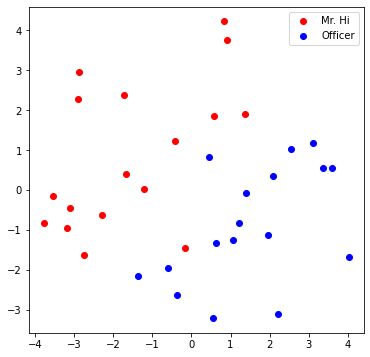

In [21]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.